In [1]:
library(data.table)
library(ggplot2)
library(glue)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [8]:
# set plot size
options(repr.plot.width = 15, repr.plot.height = 8) 


# QC plots - all samples (new)

In [2]:
demuxafy_dir = "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy"

In [3]:
vireo_dir = file.path(demuxafy_dir, "vireo/output")

In [4]:
# list.files(demuxafy_dir)
all_samples <- list.files(vireo_dir)

In [5]:
length(all_samples)

[1] 43

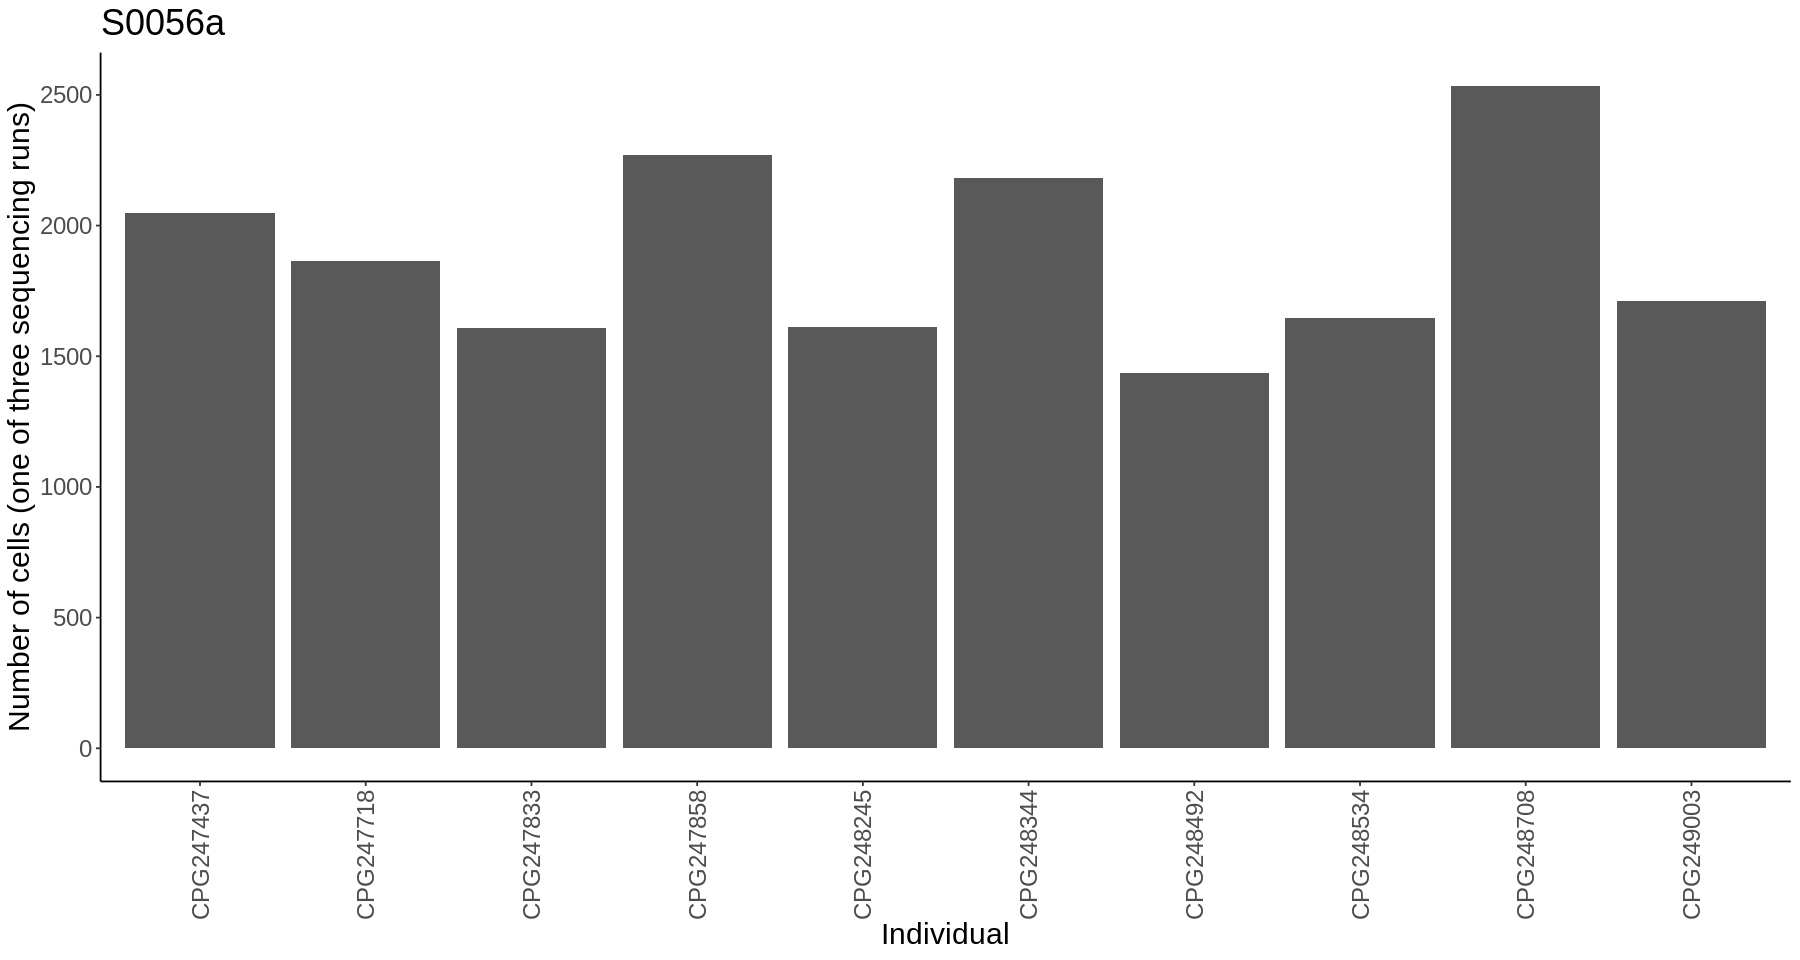

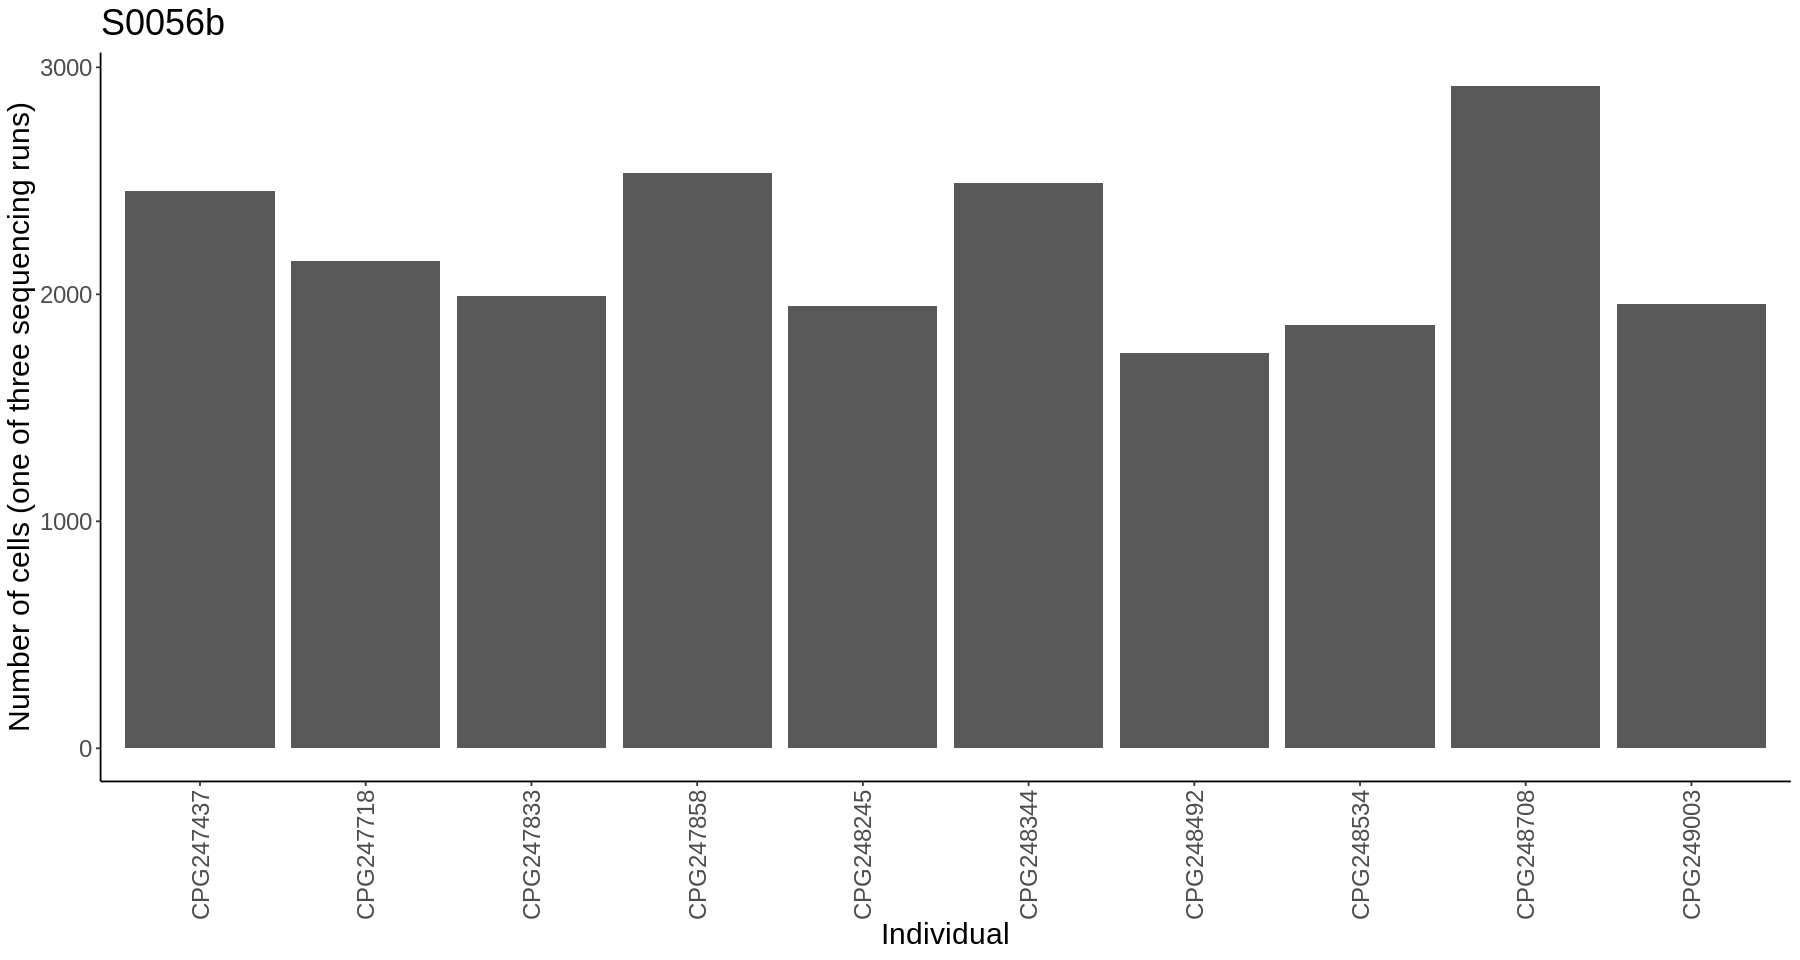

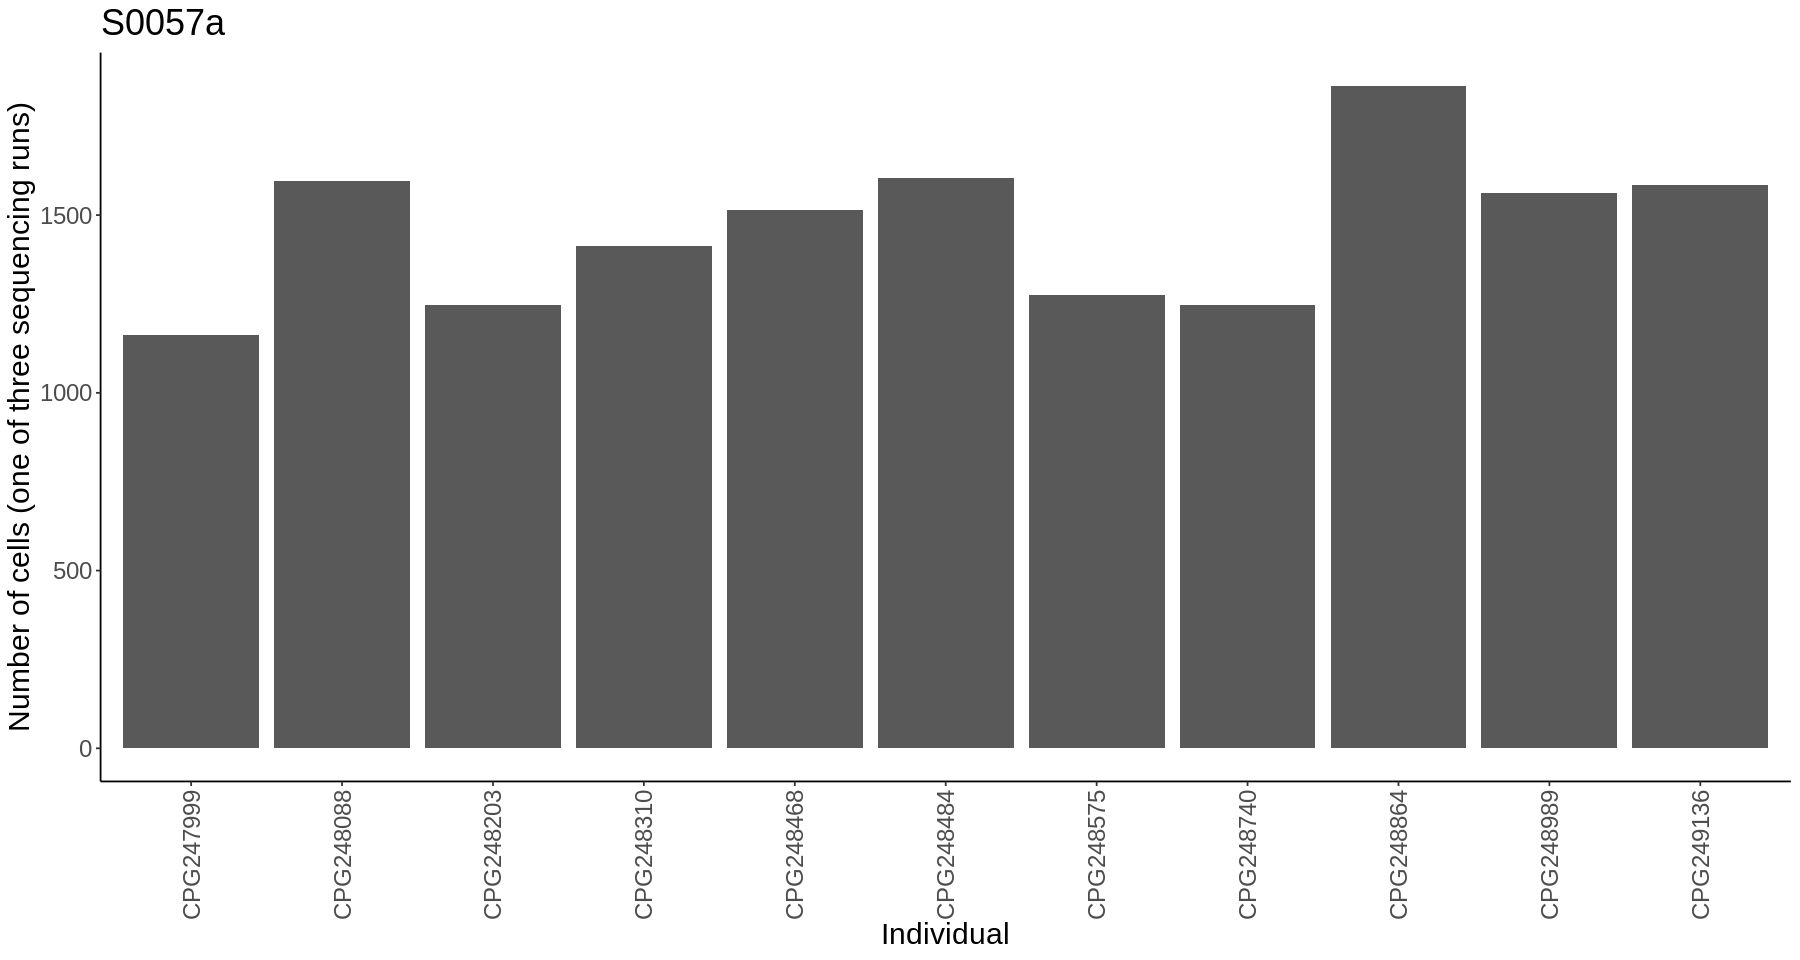

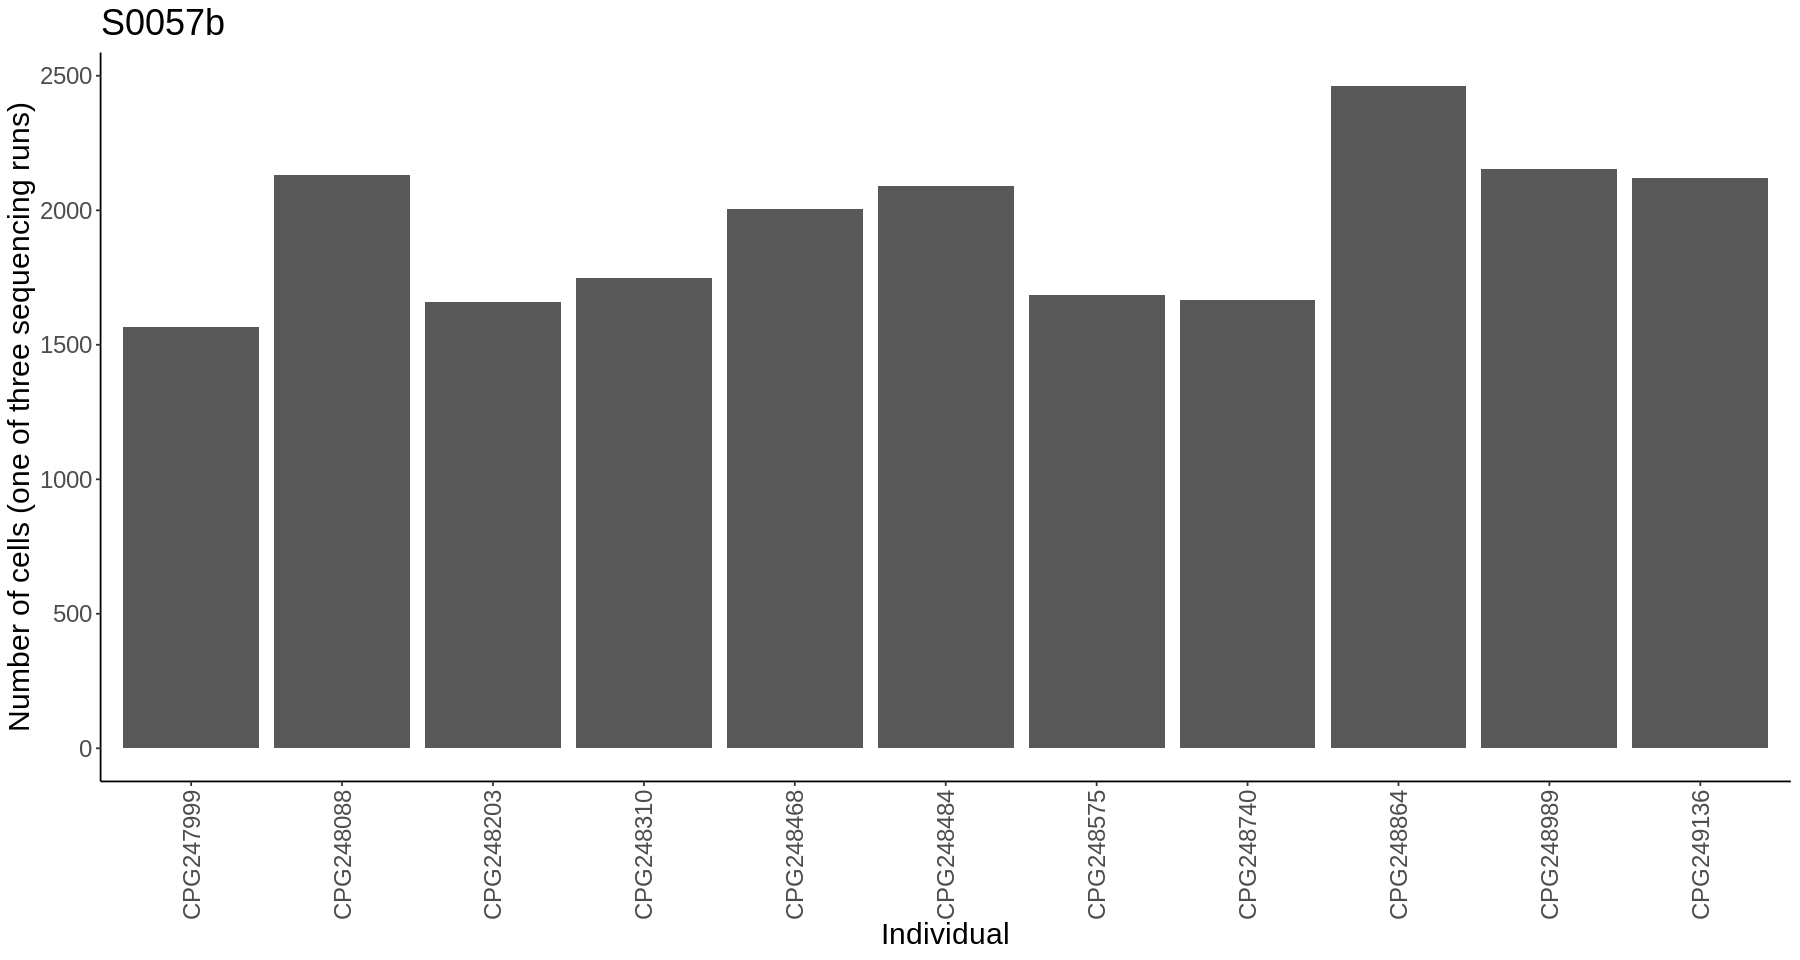

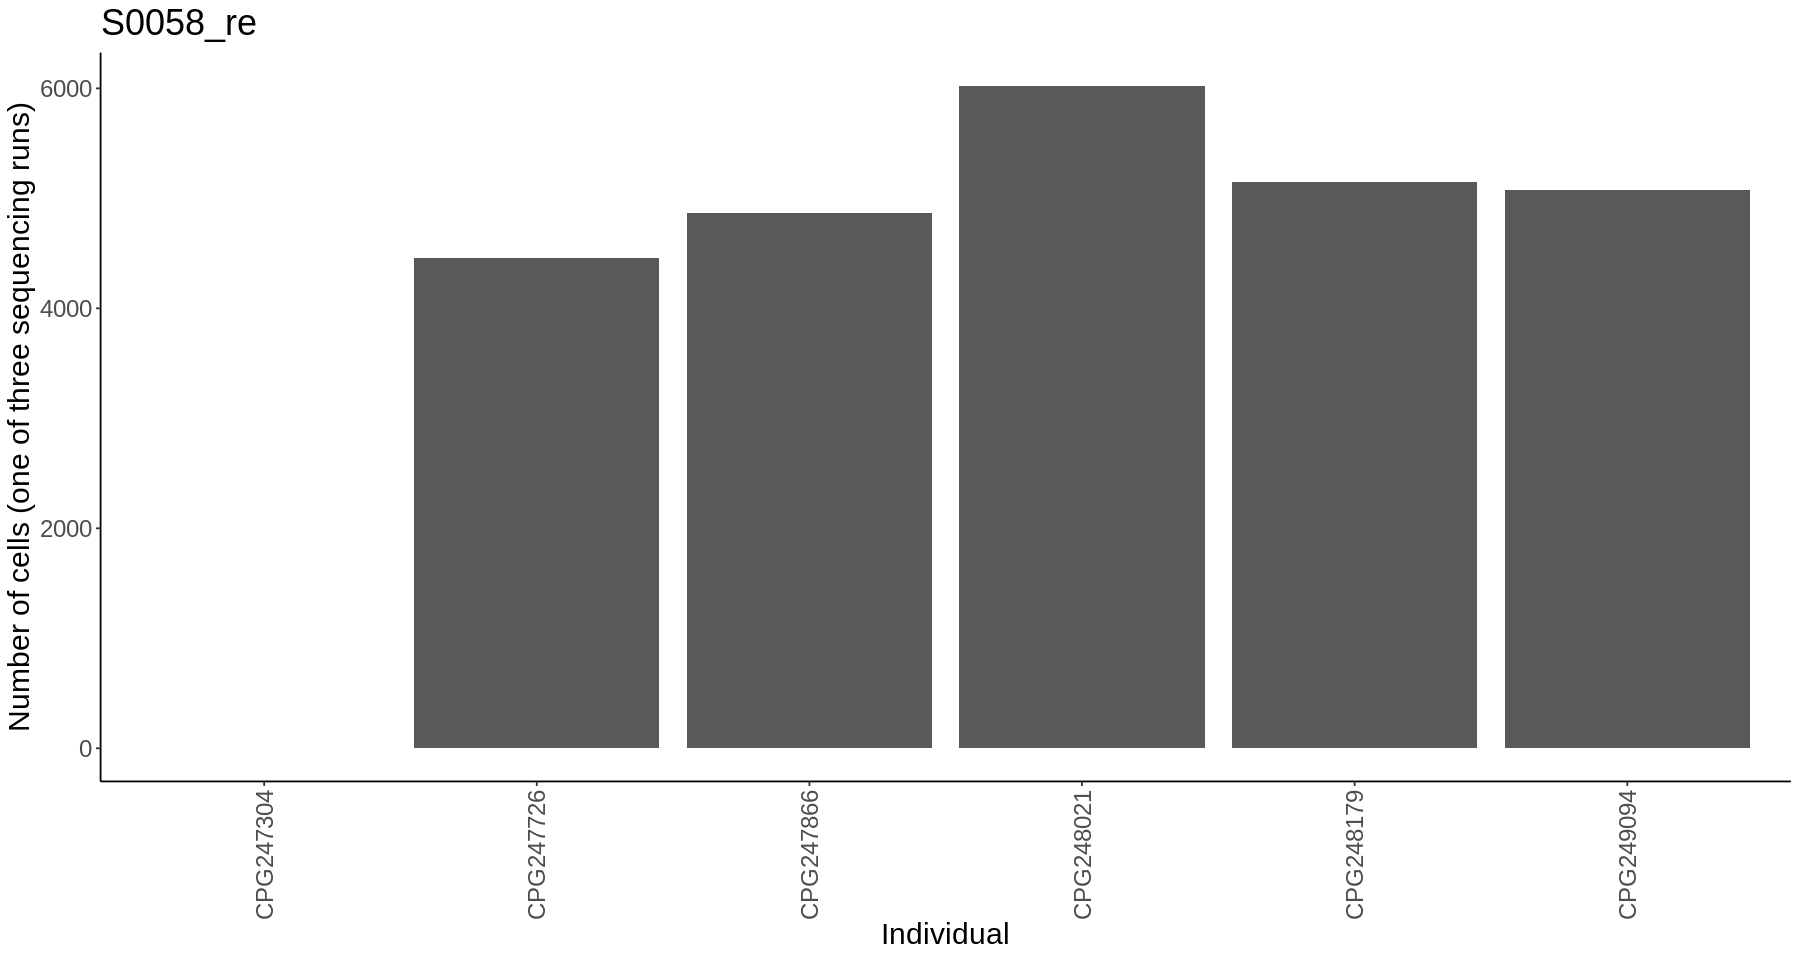

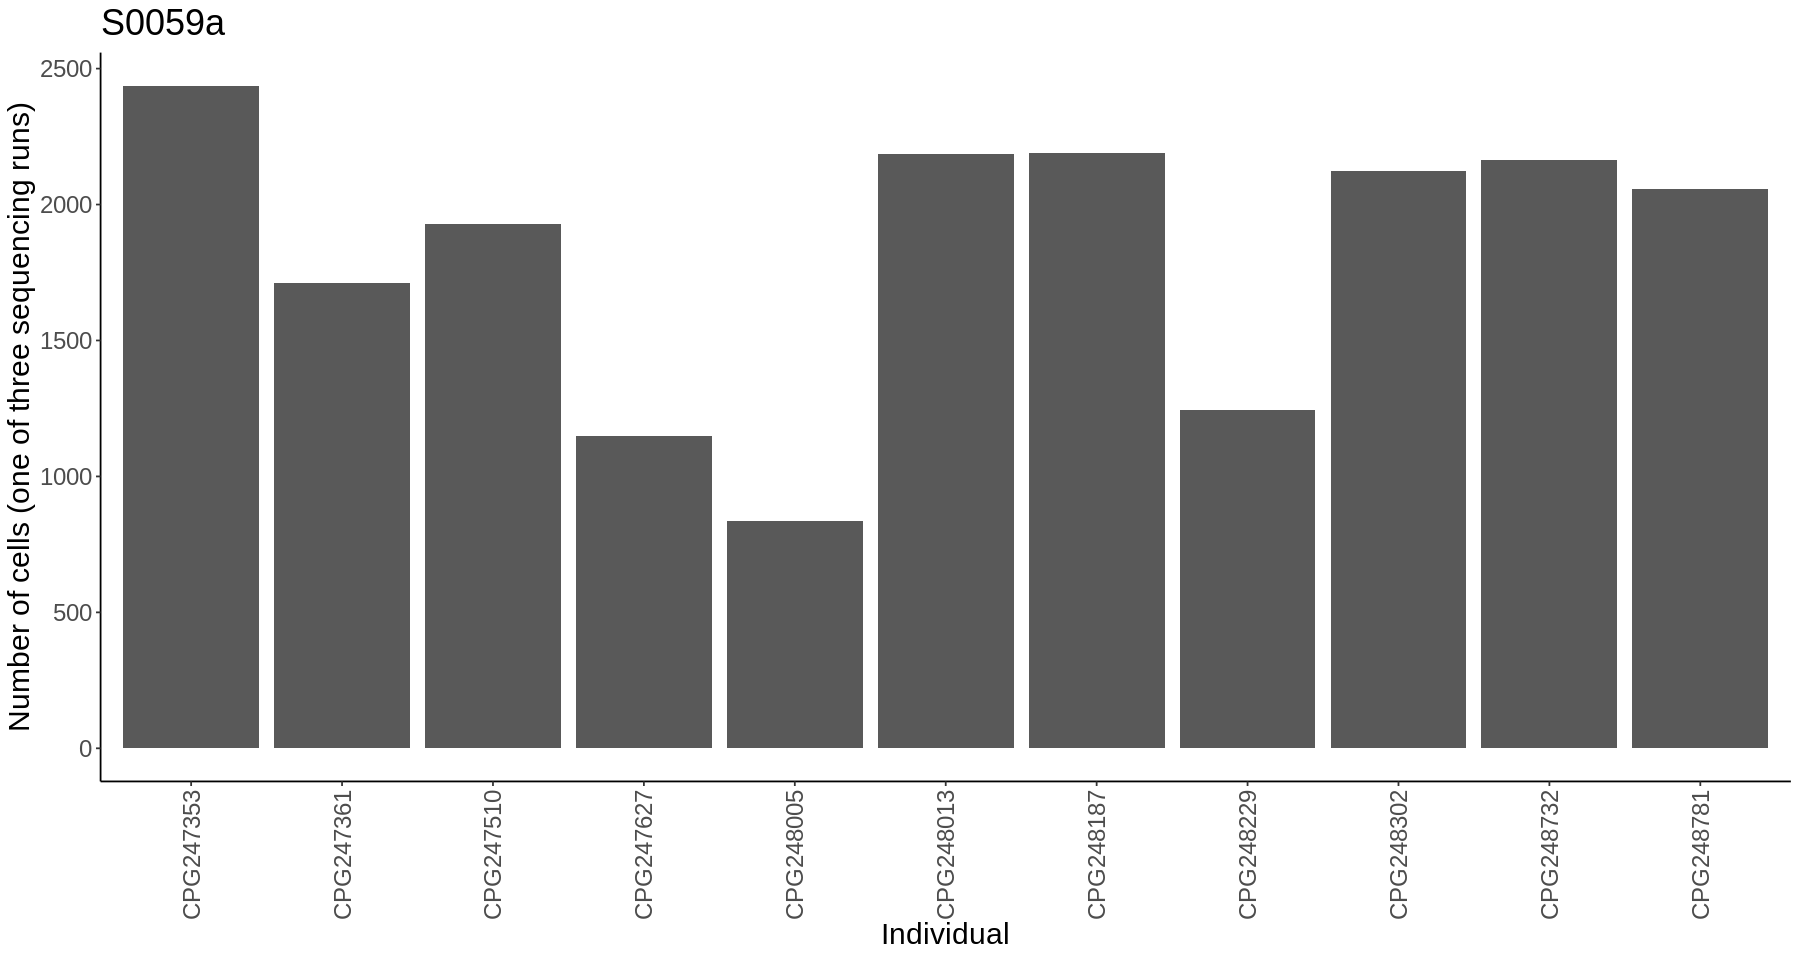

/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0070/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0074/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0077/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0080/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0083/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0088/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0096/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/o

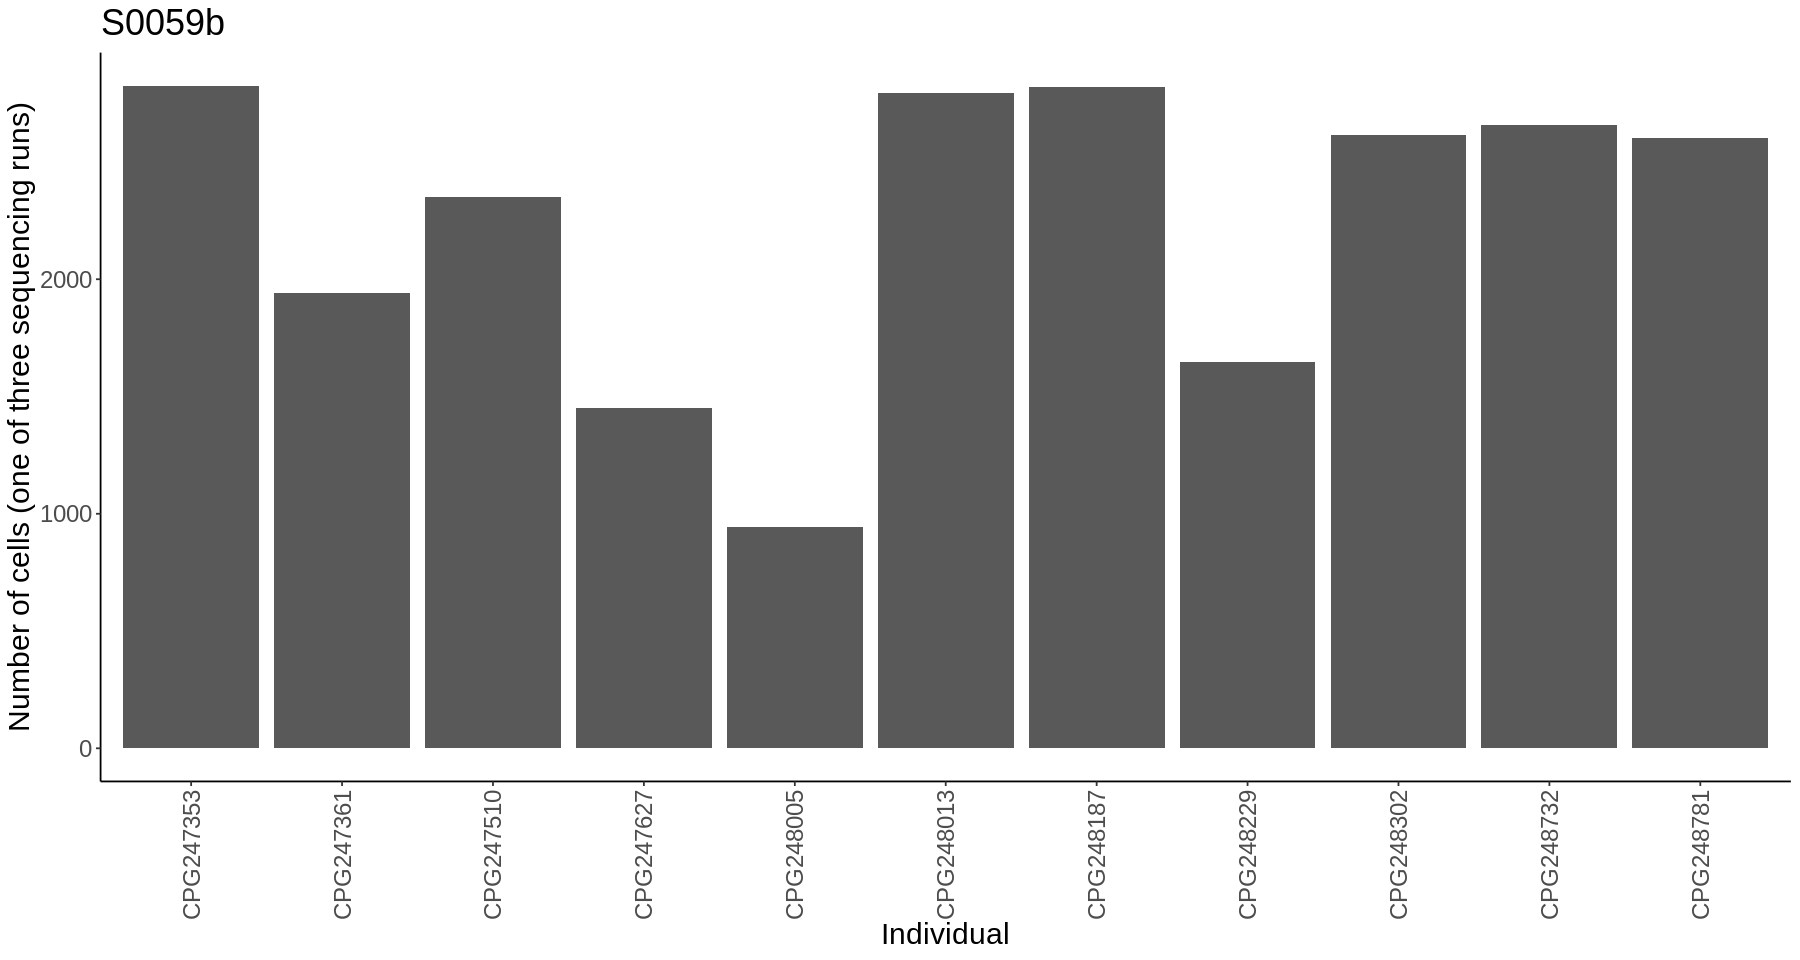

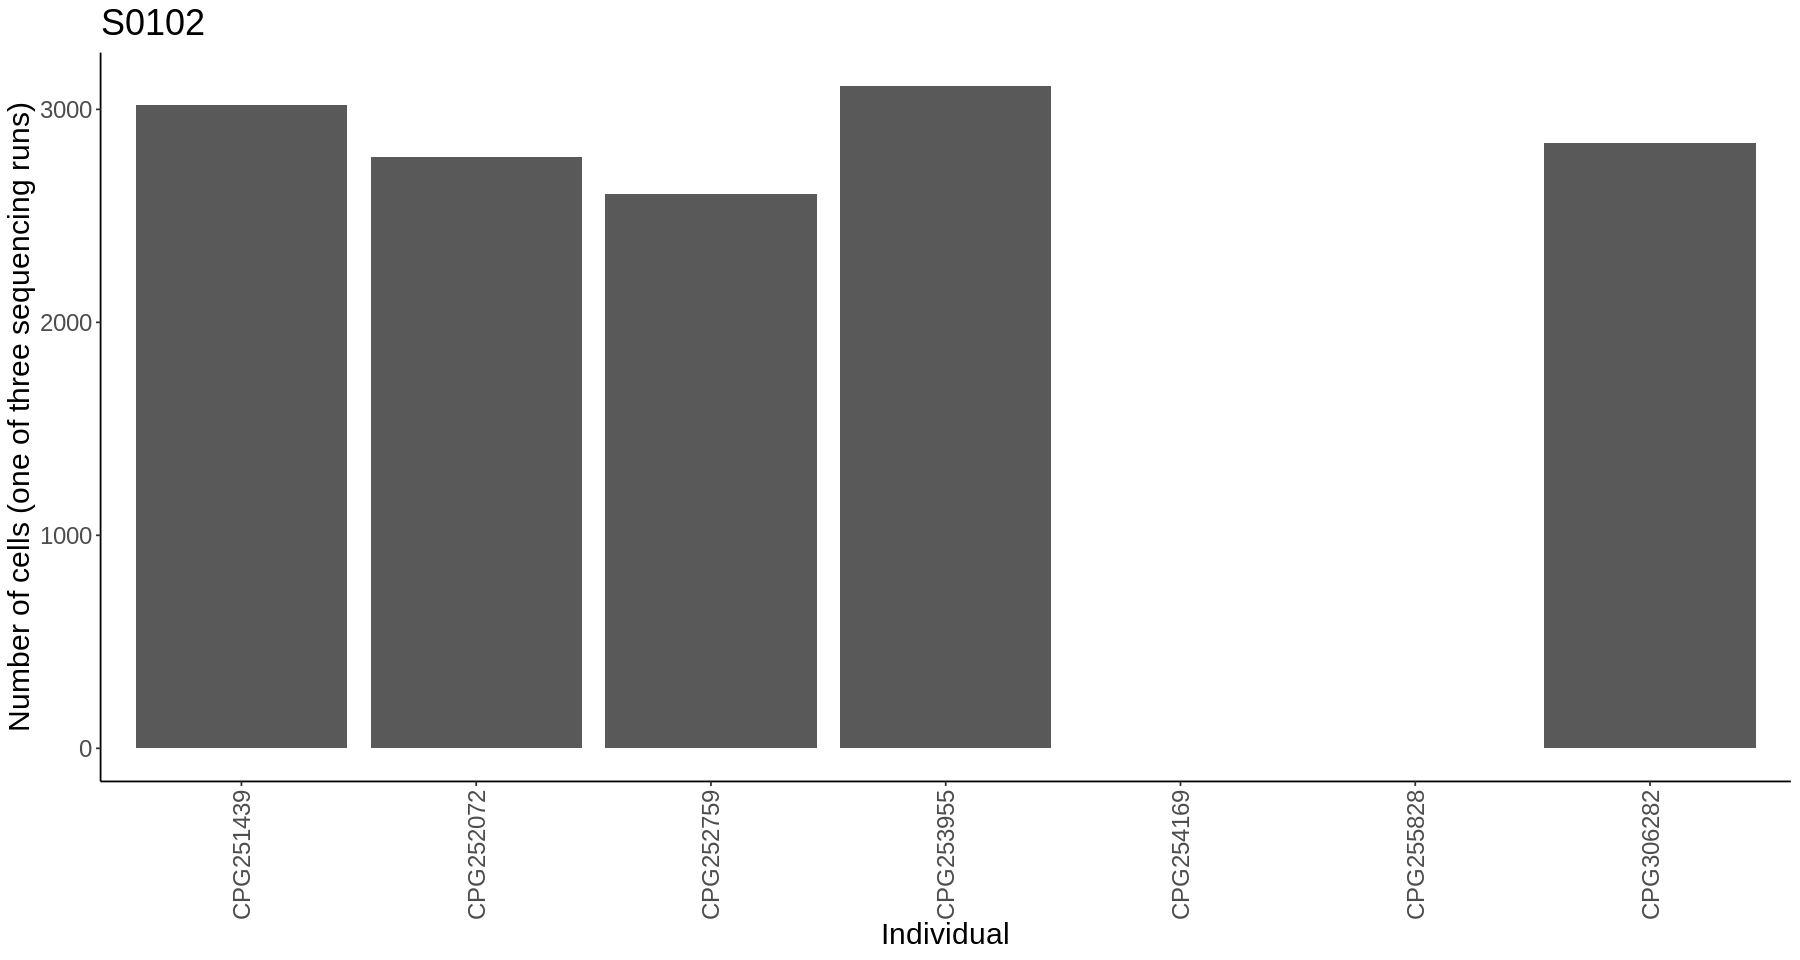

/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0108/summary.tsv does not exist!


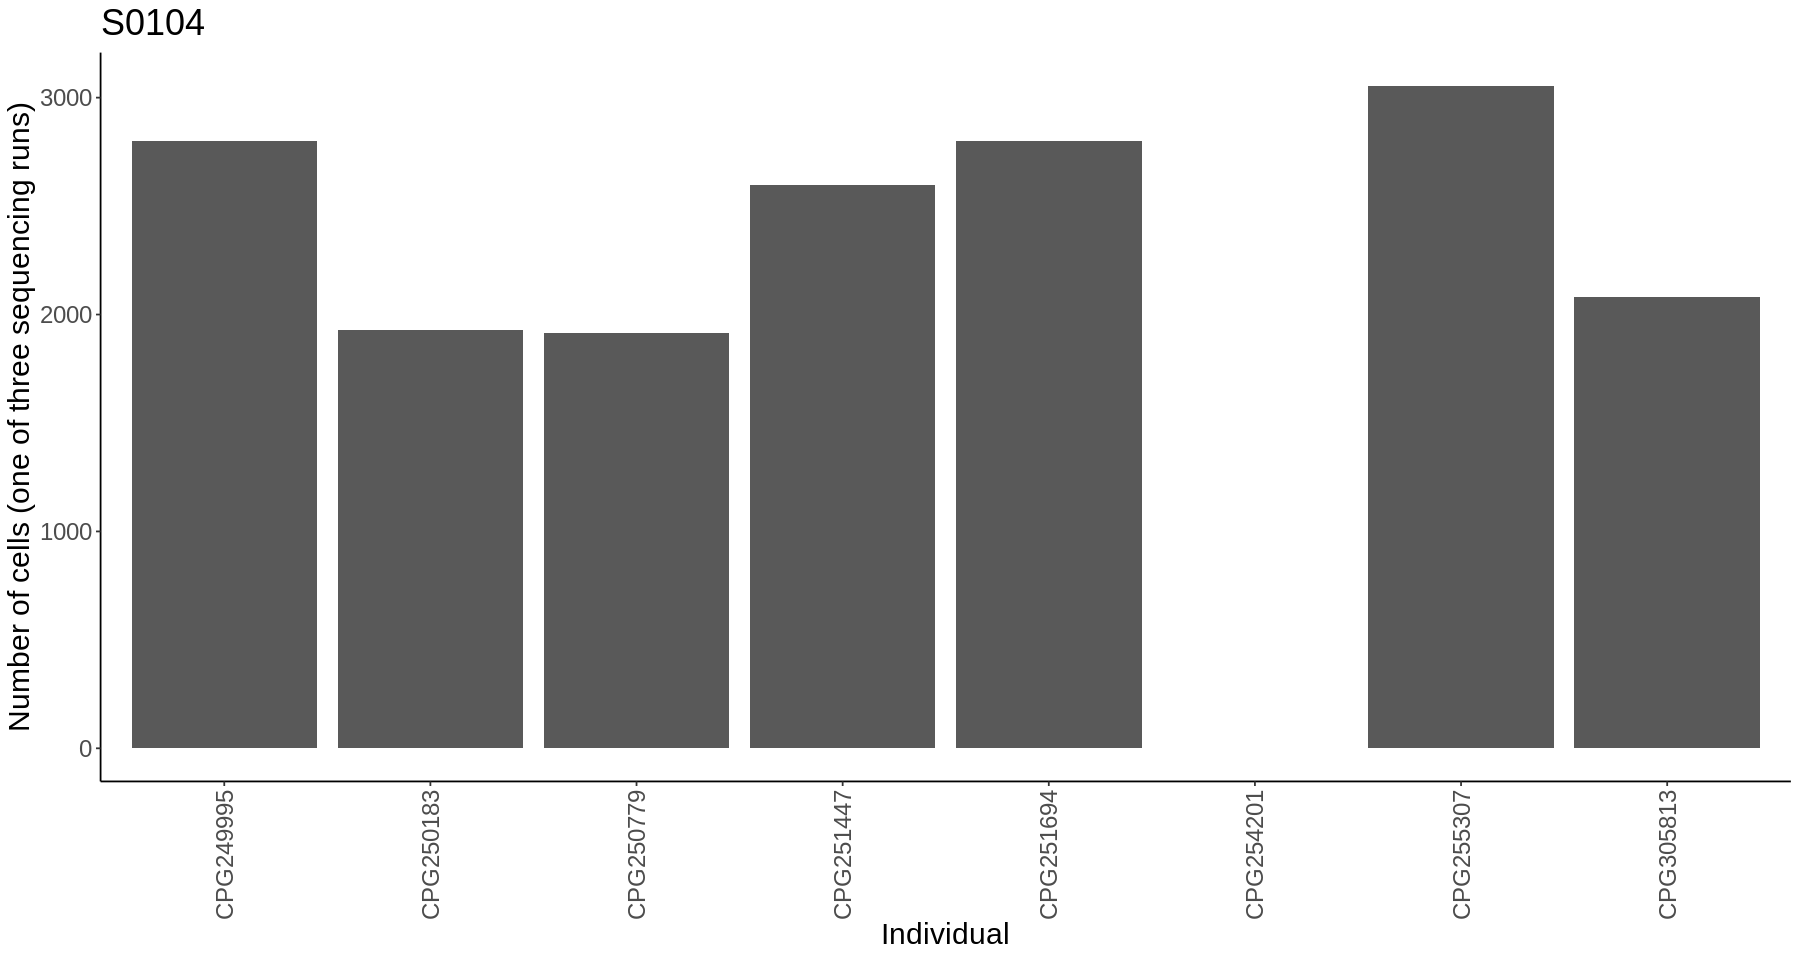

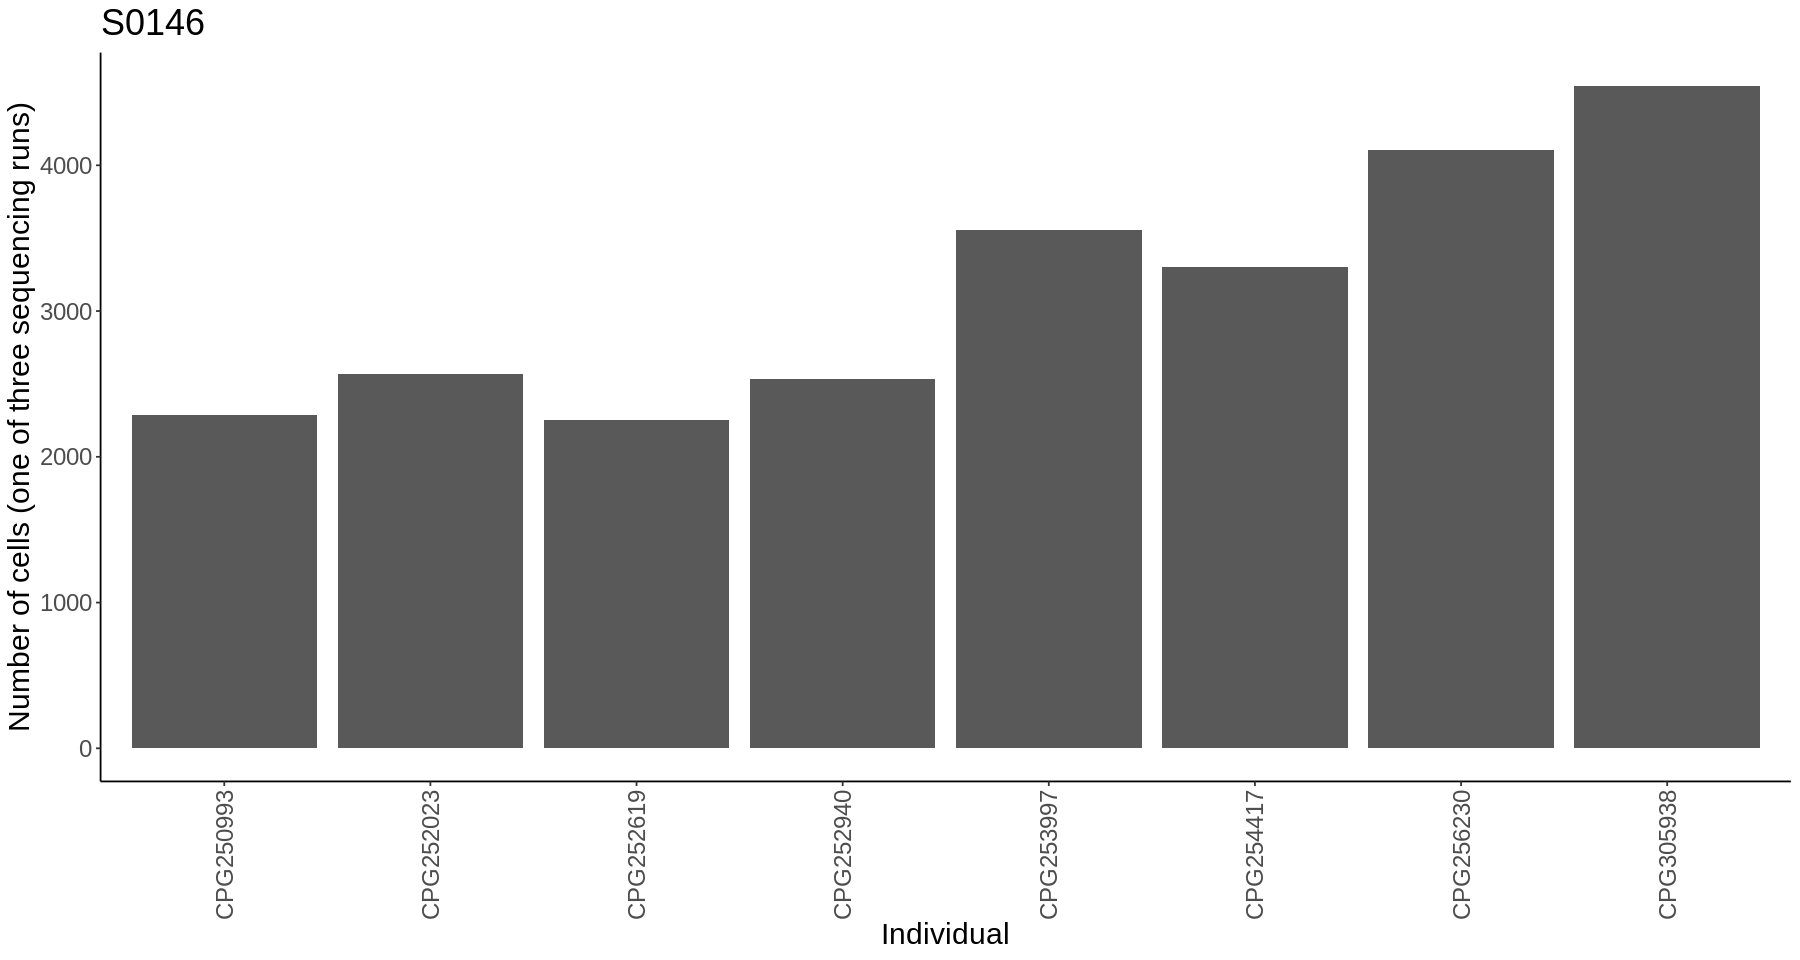

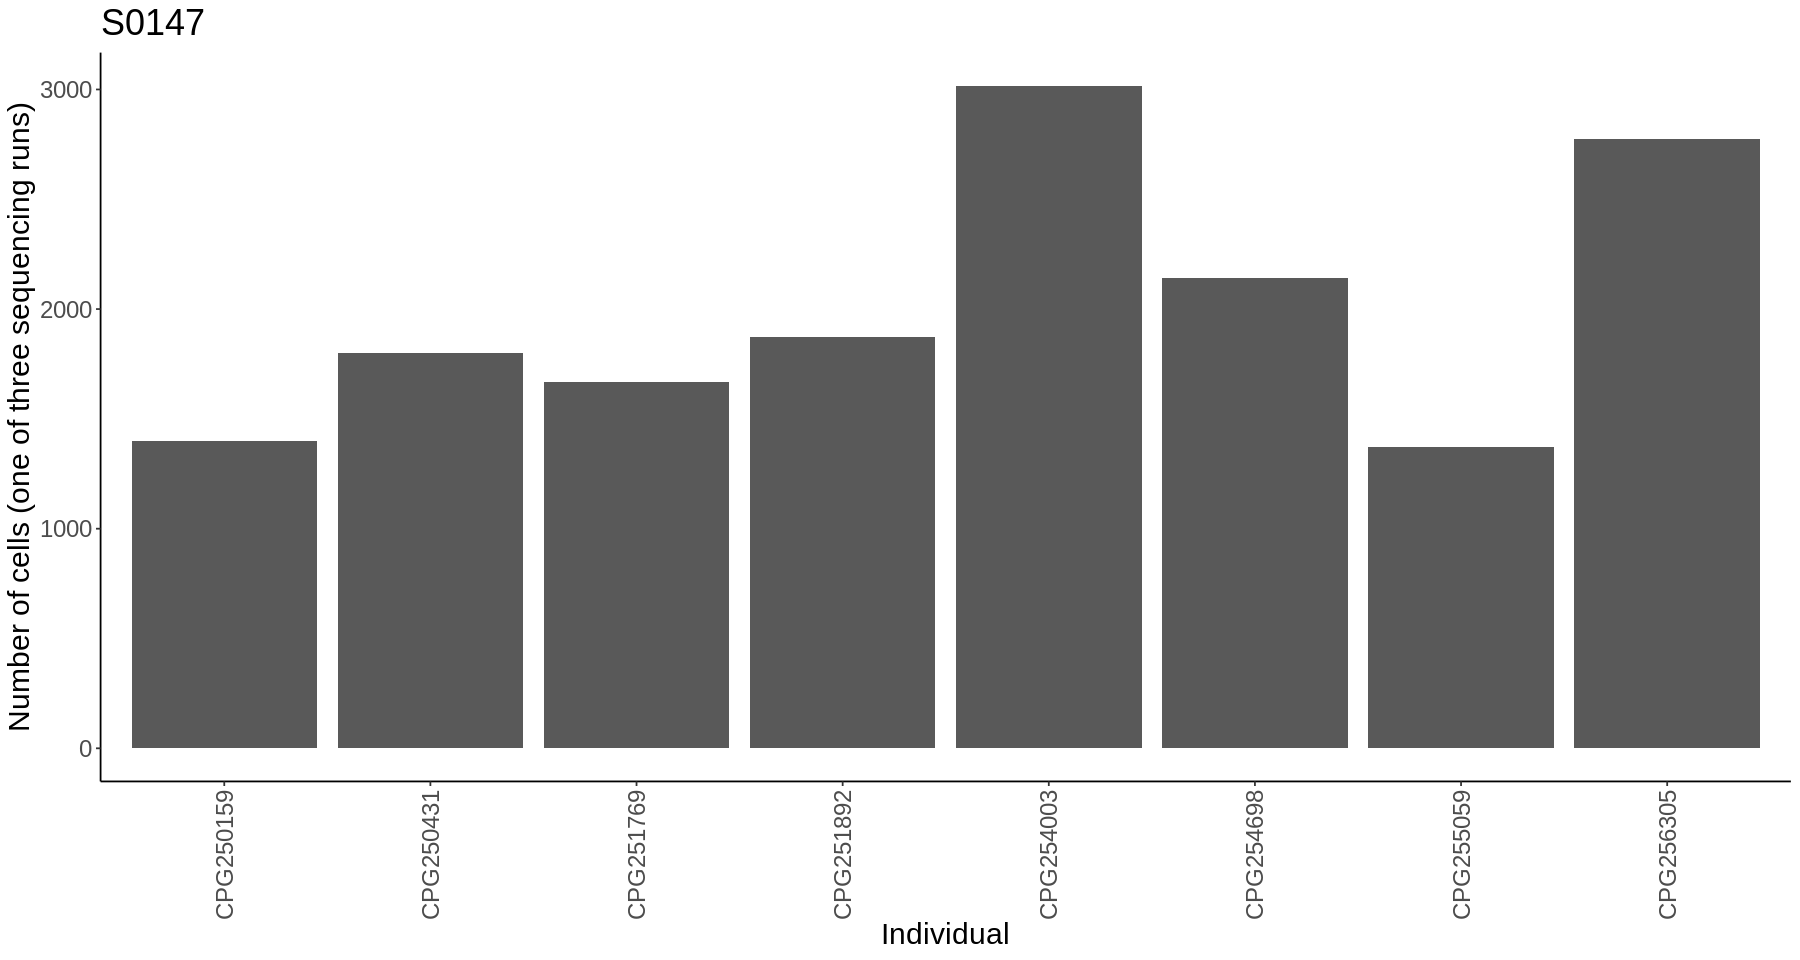

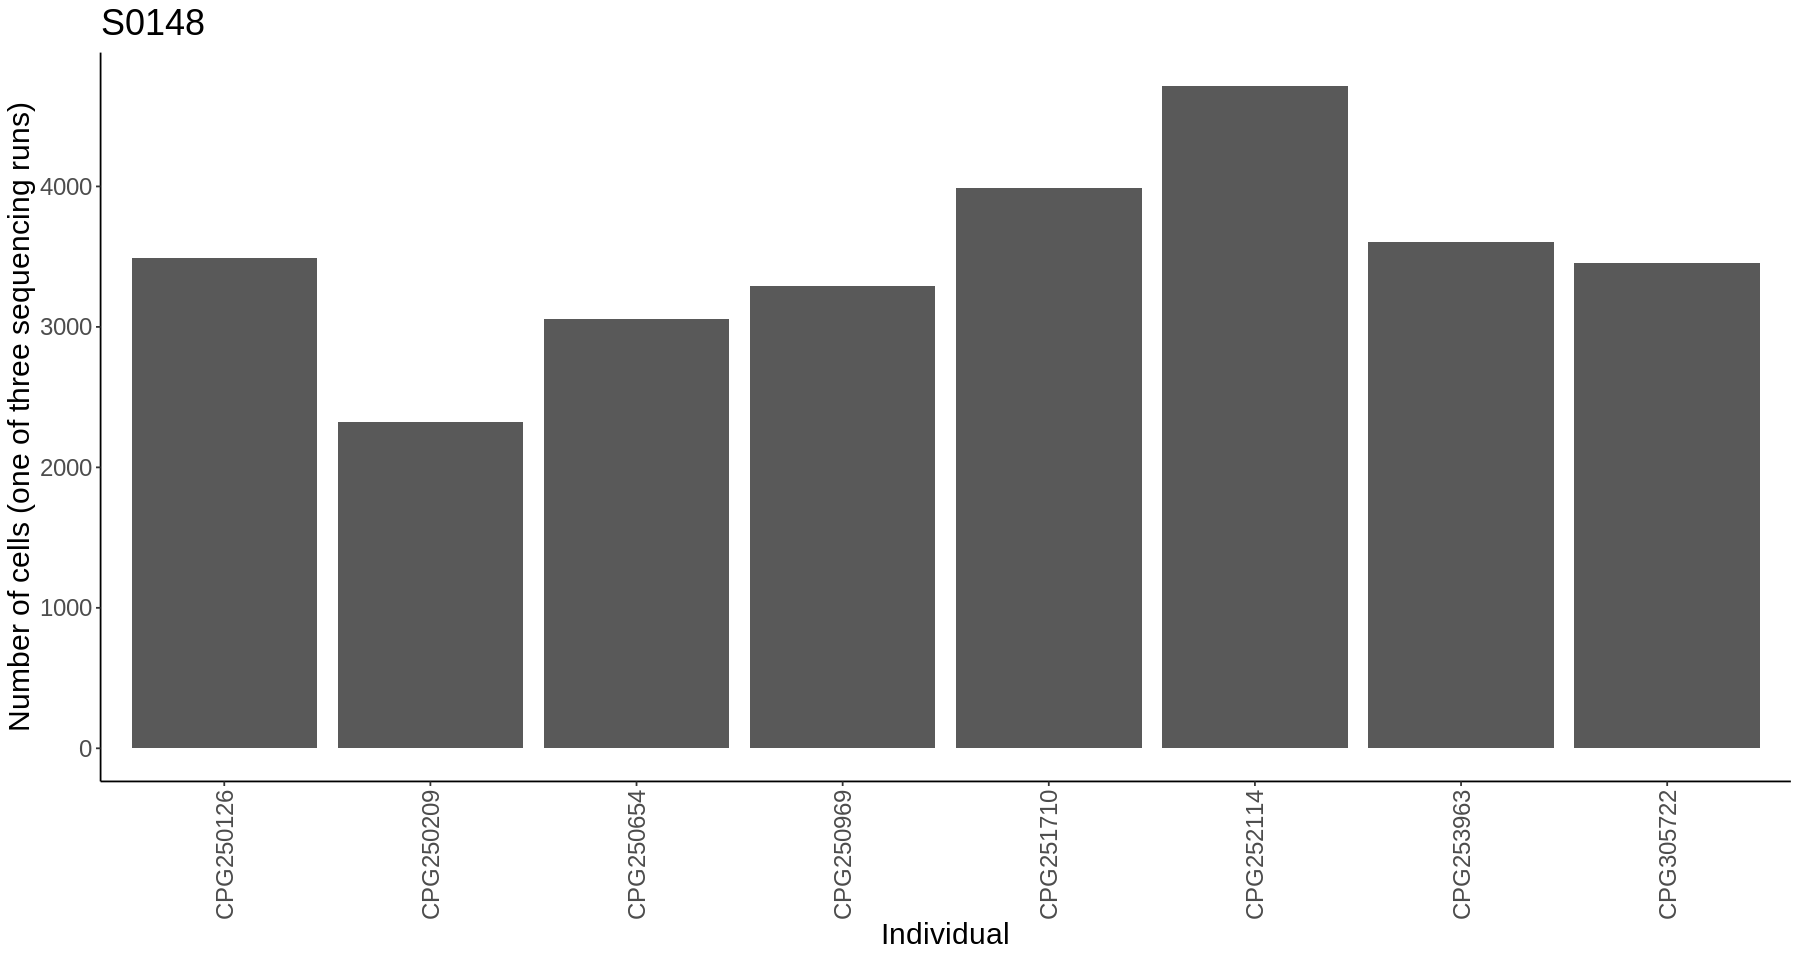

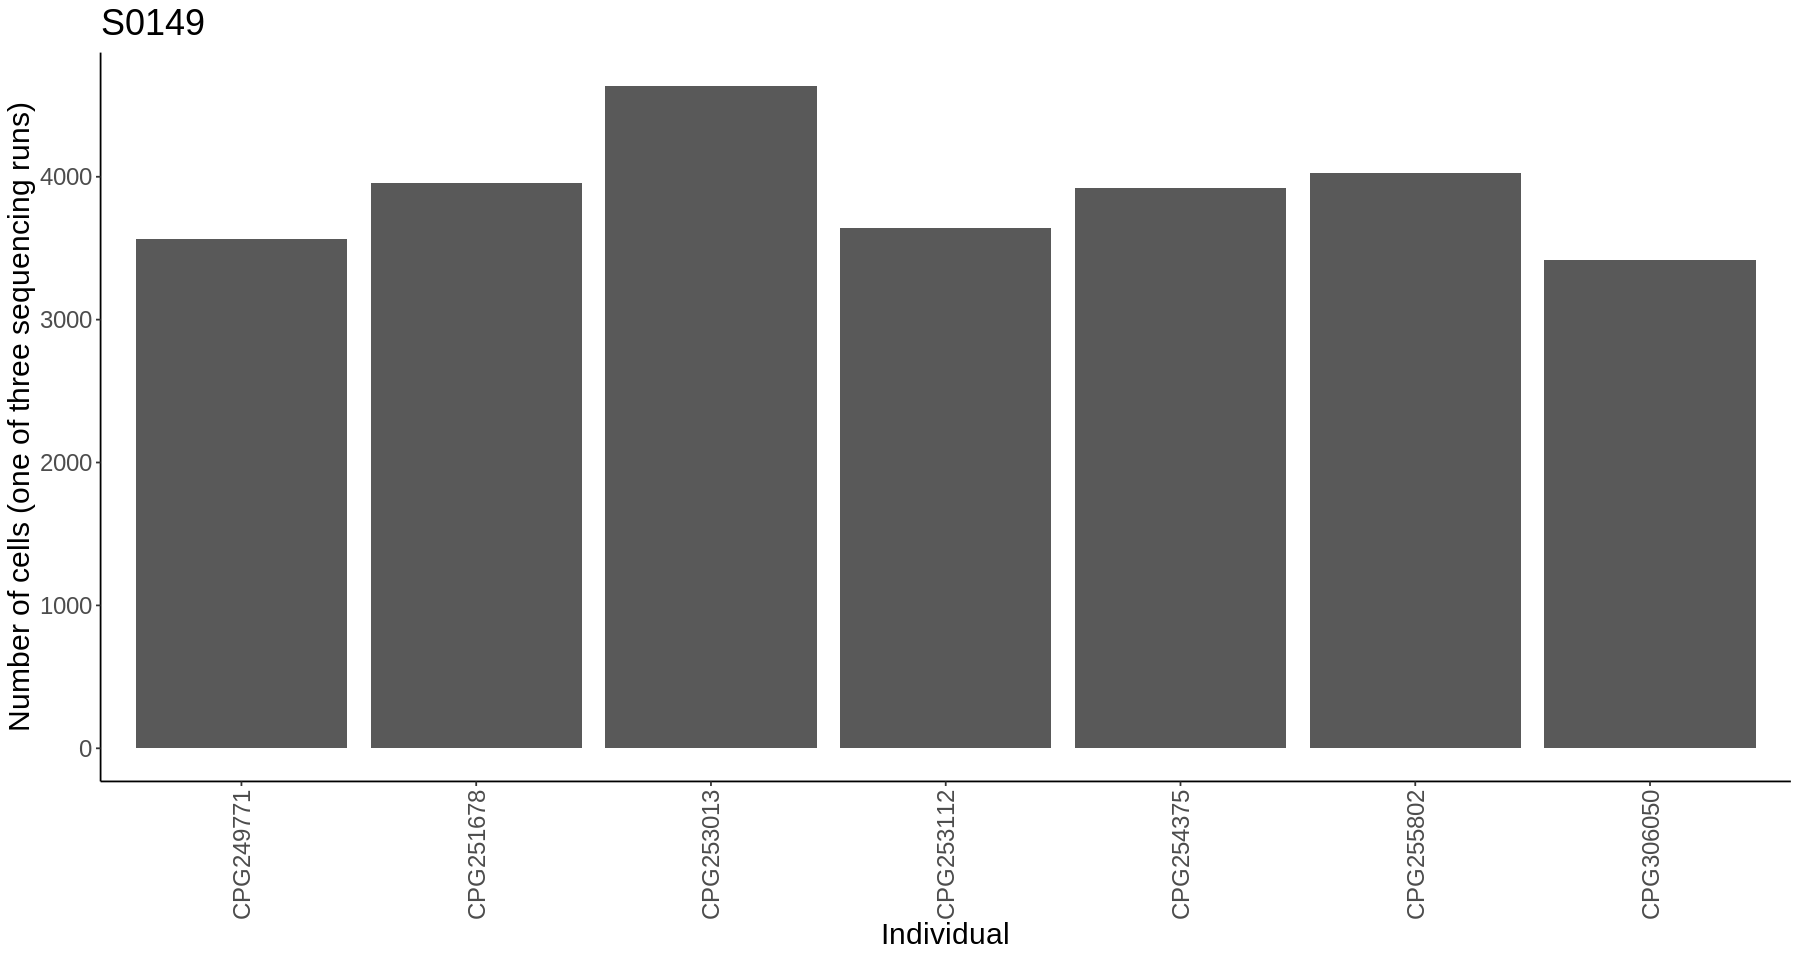

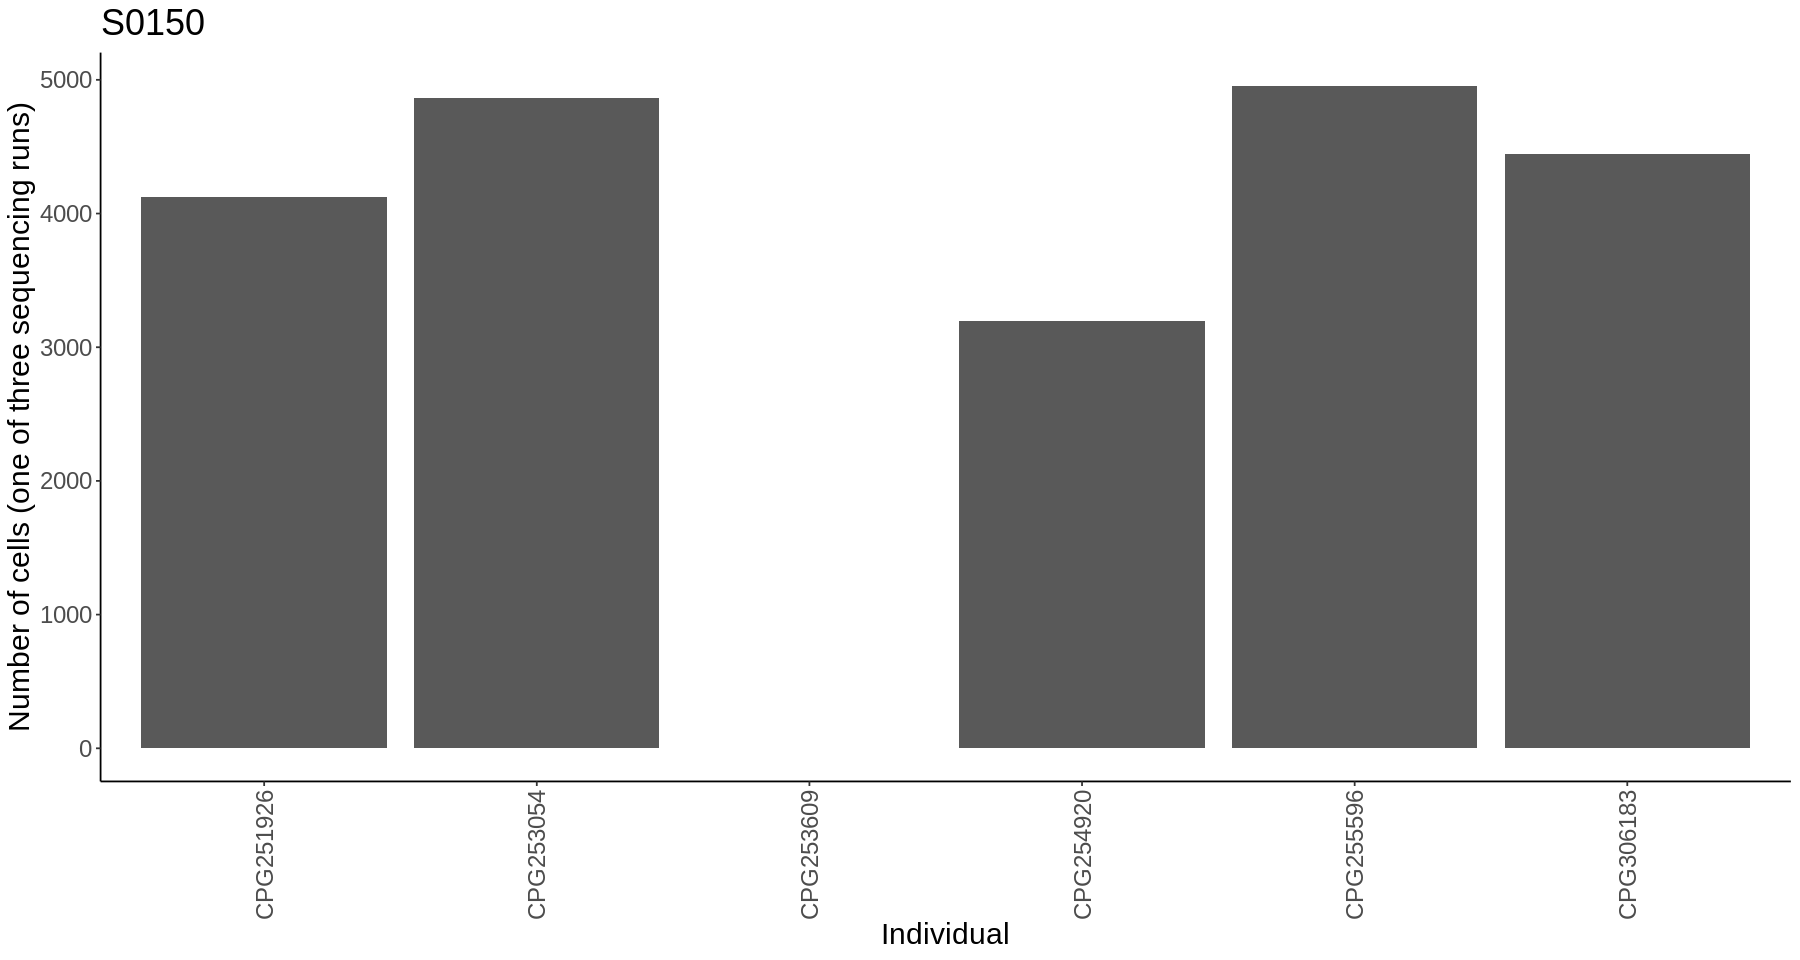

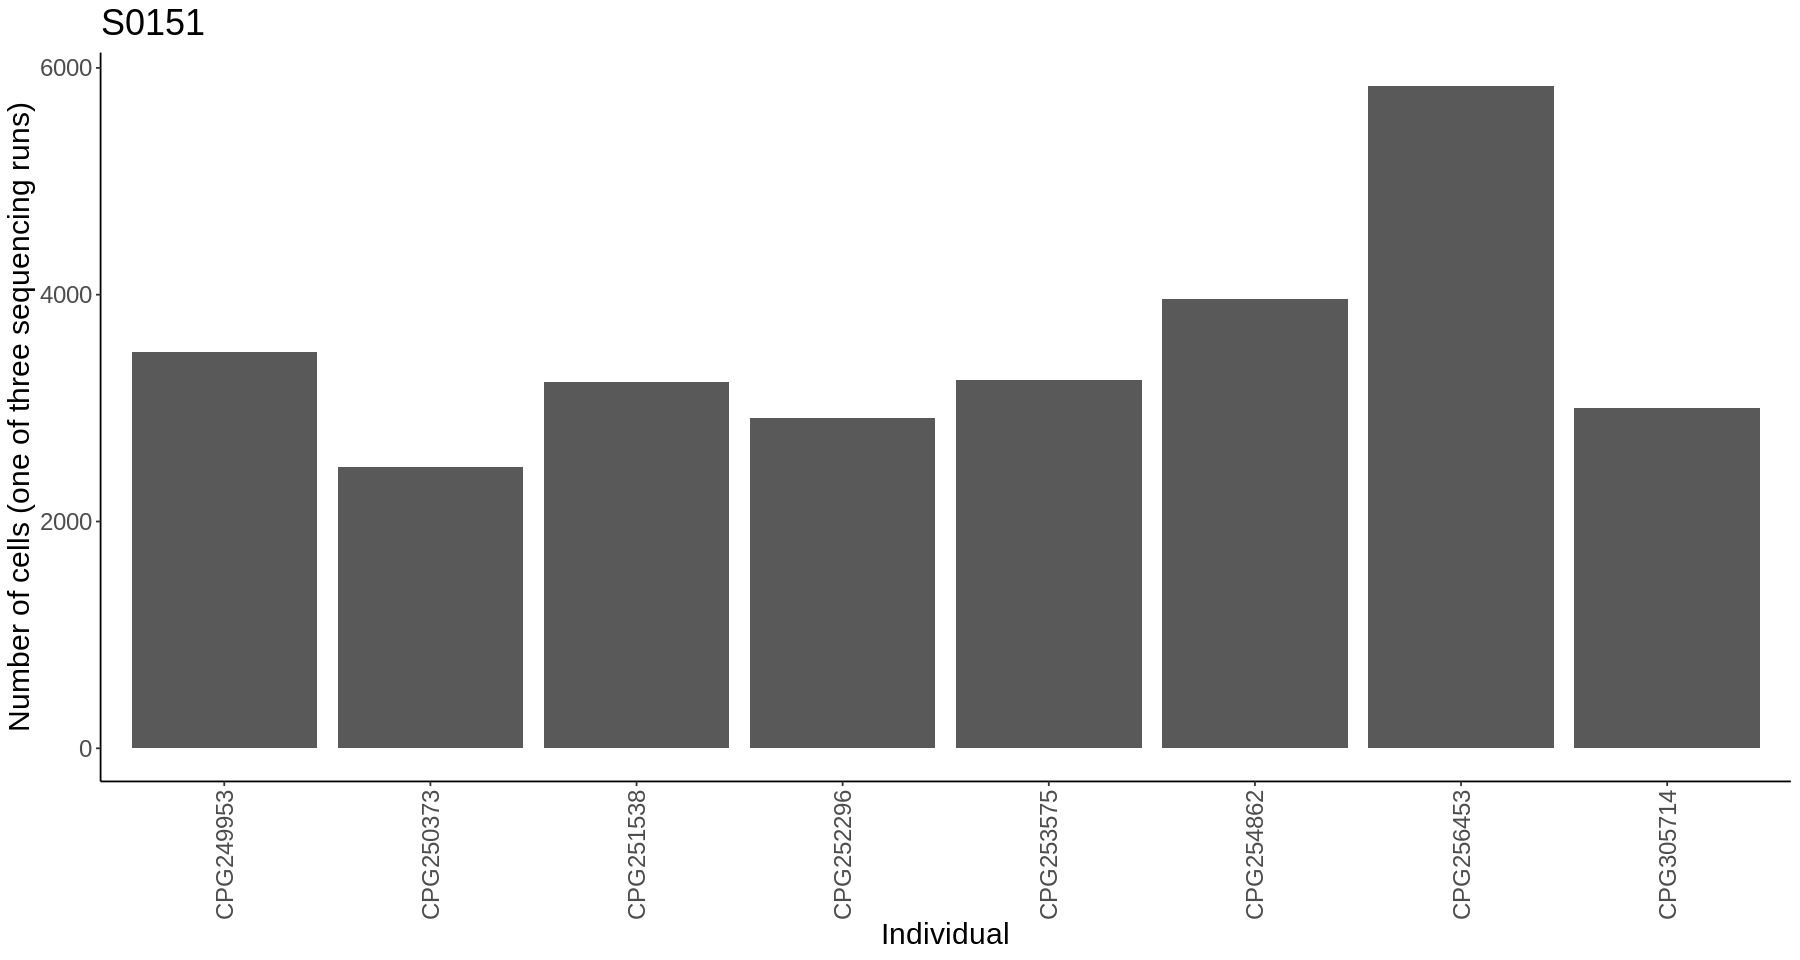

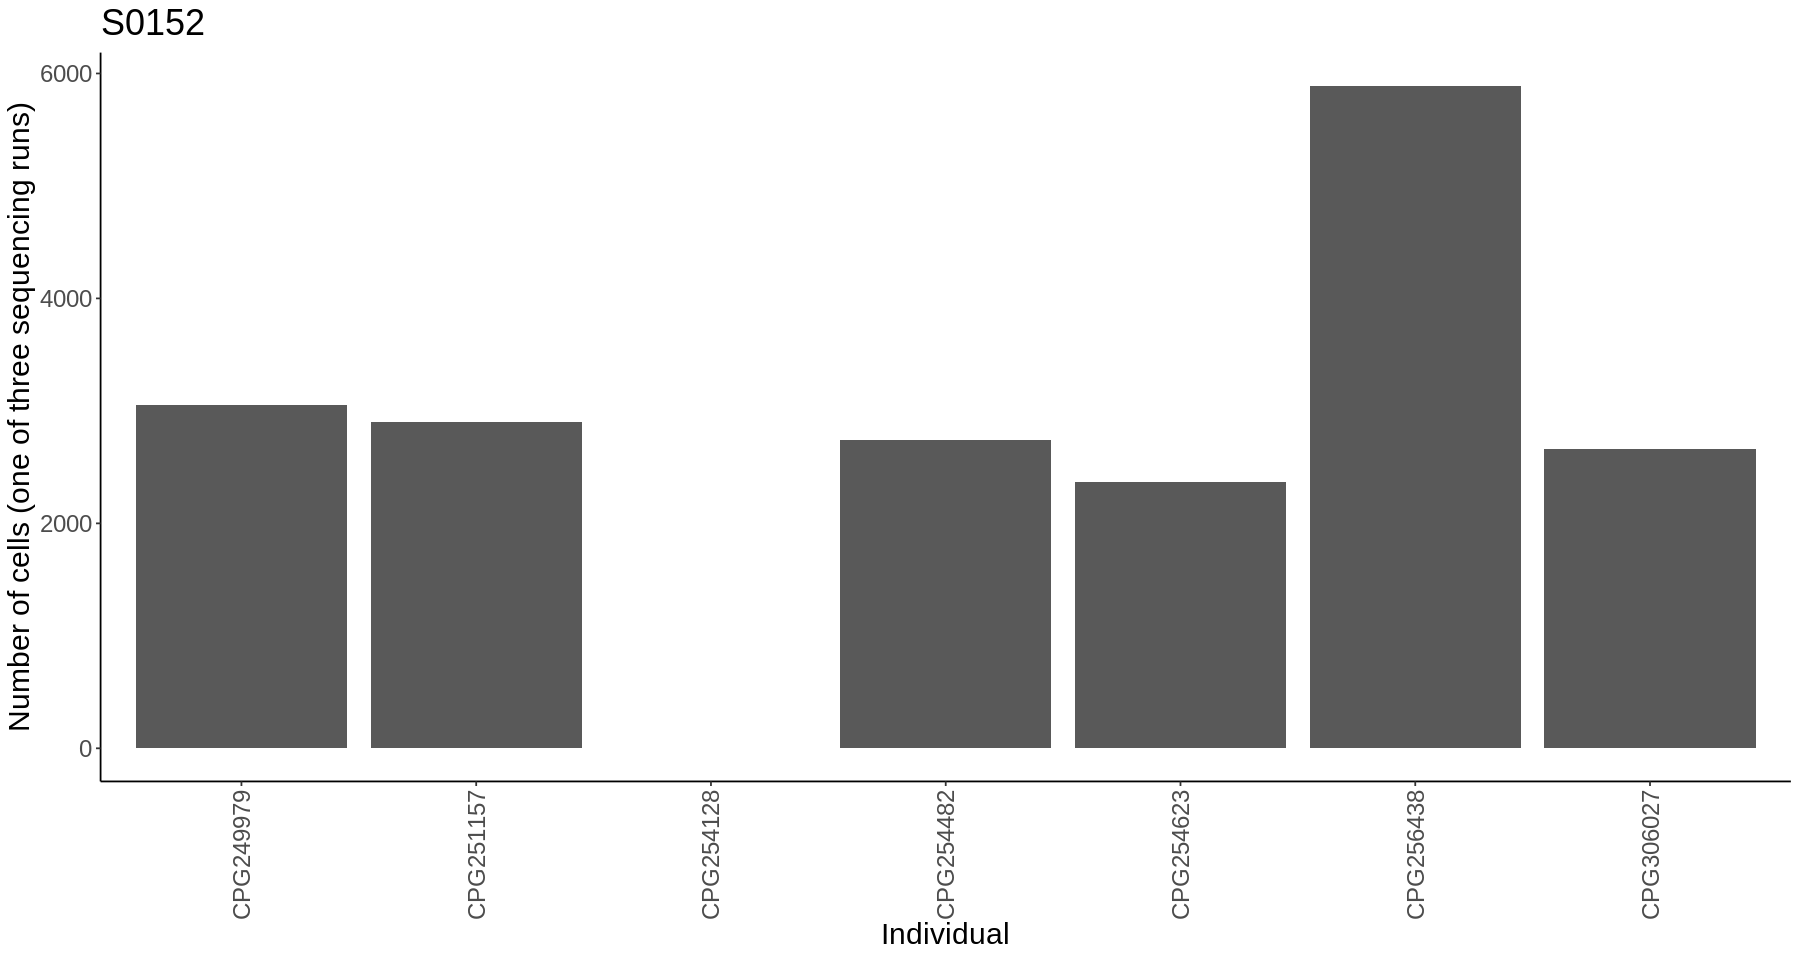

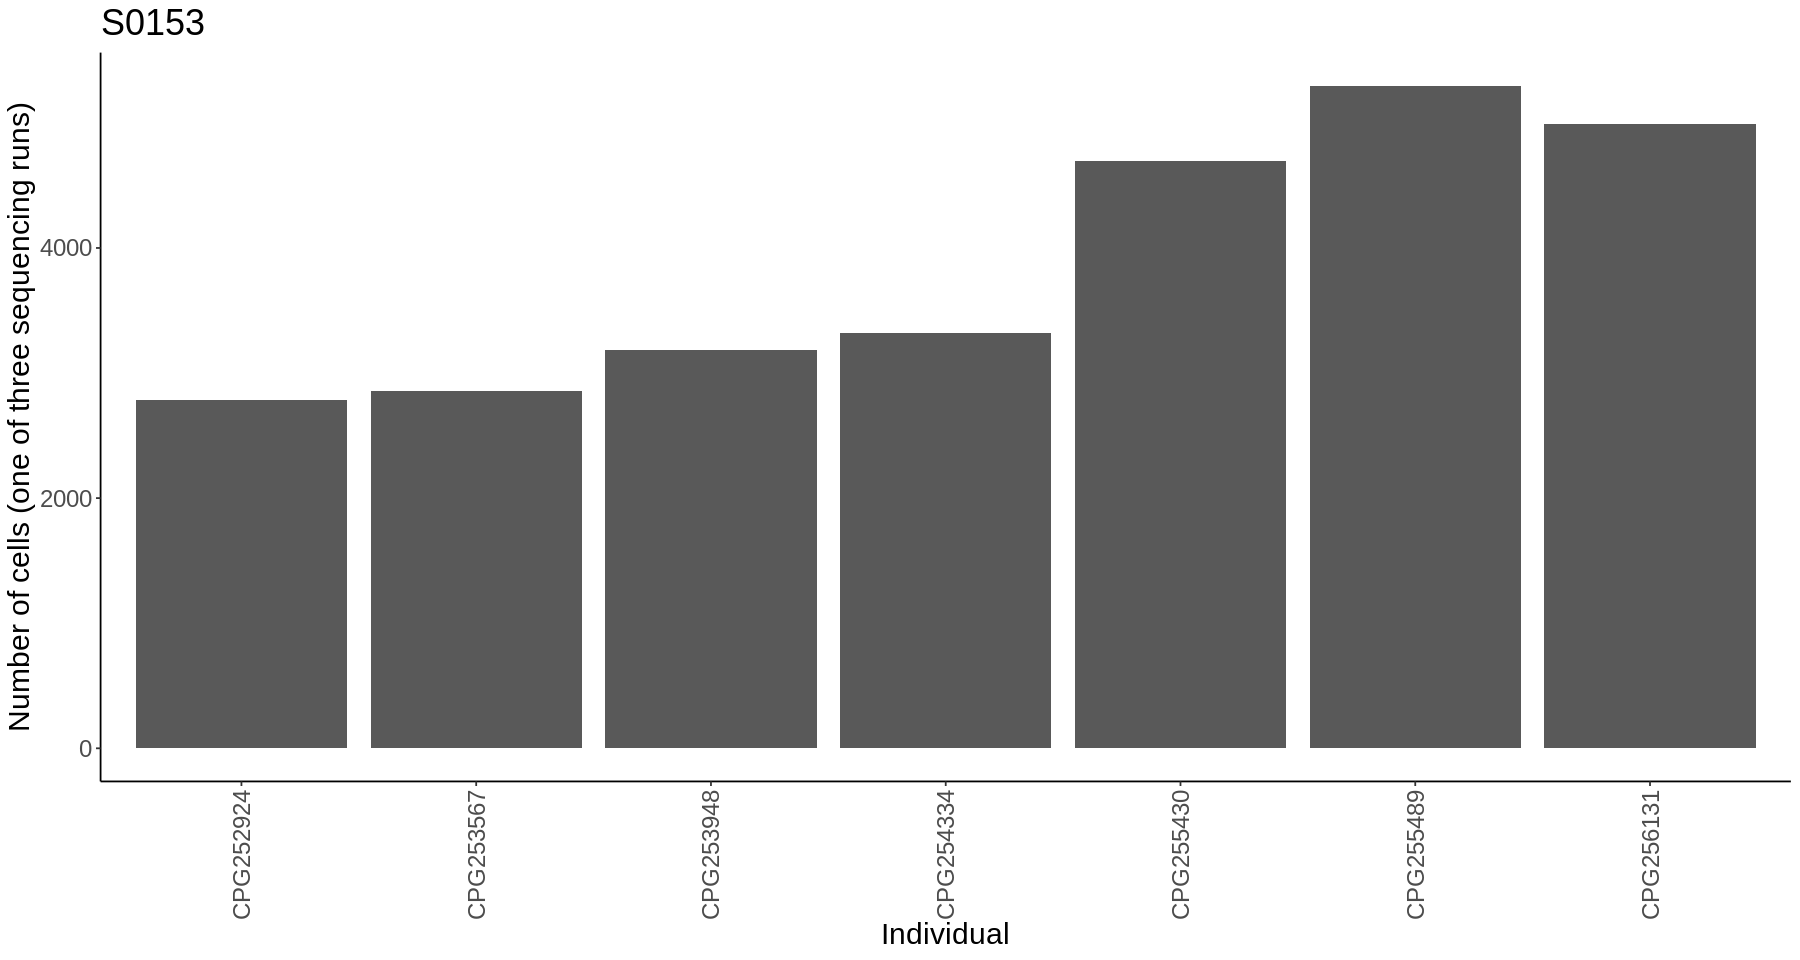

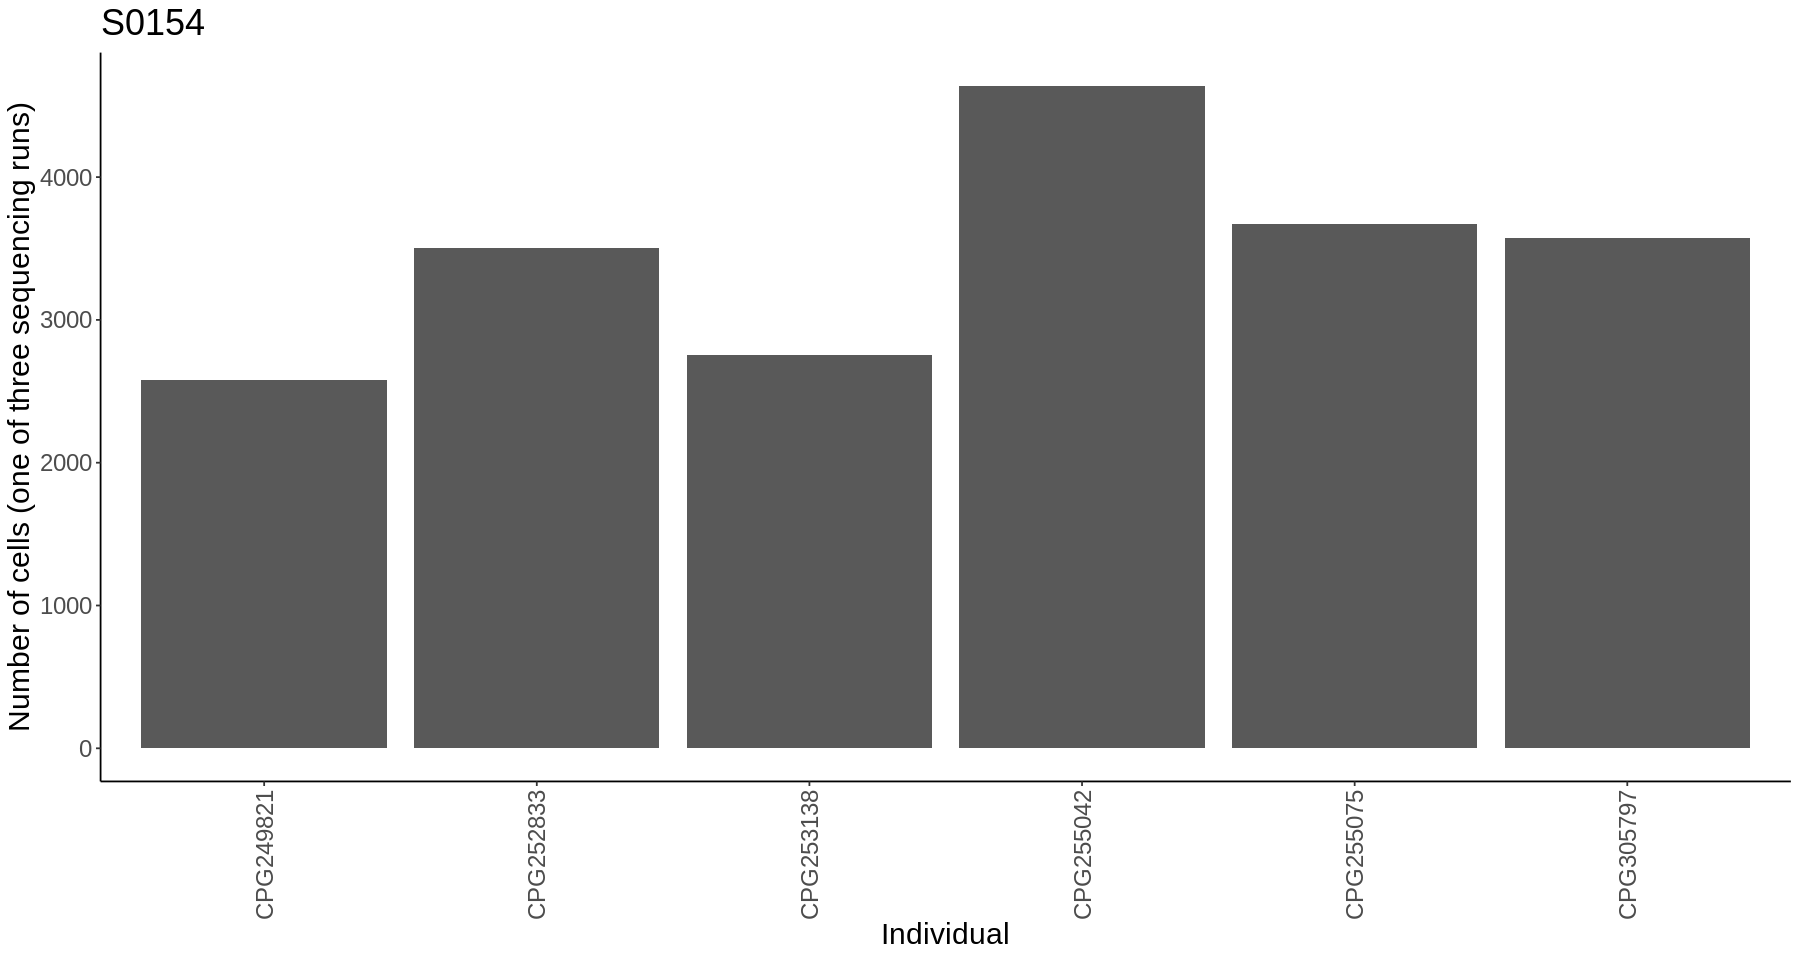

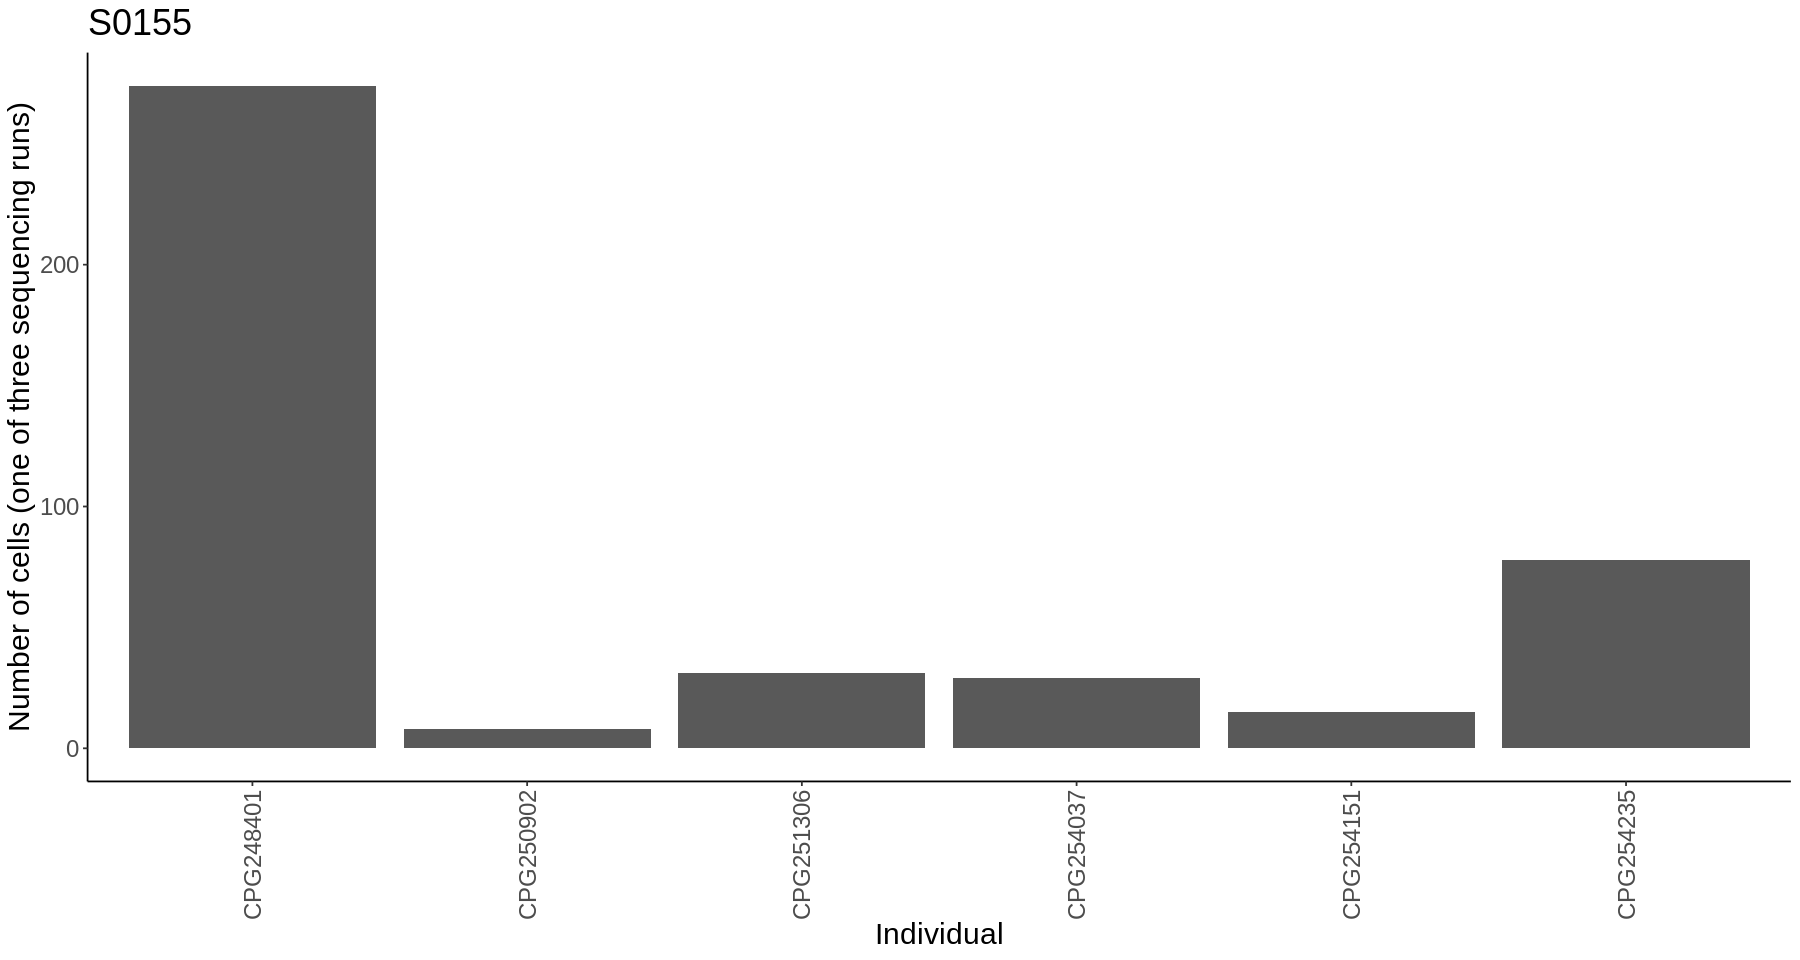

/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0157/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0158/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0159/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0160/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0161/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0162/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/S0163/summary.tsv does not exist!
/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/o

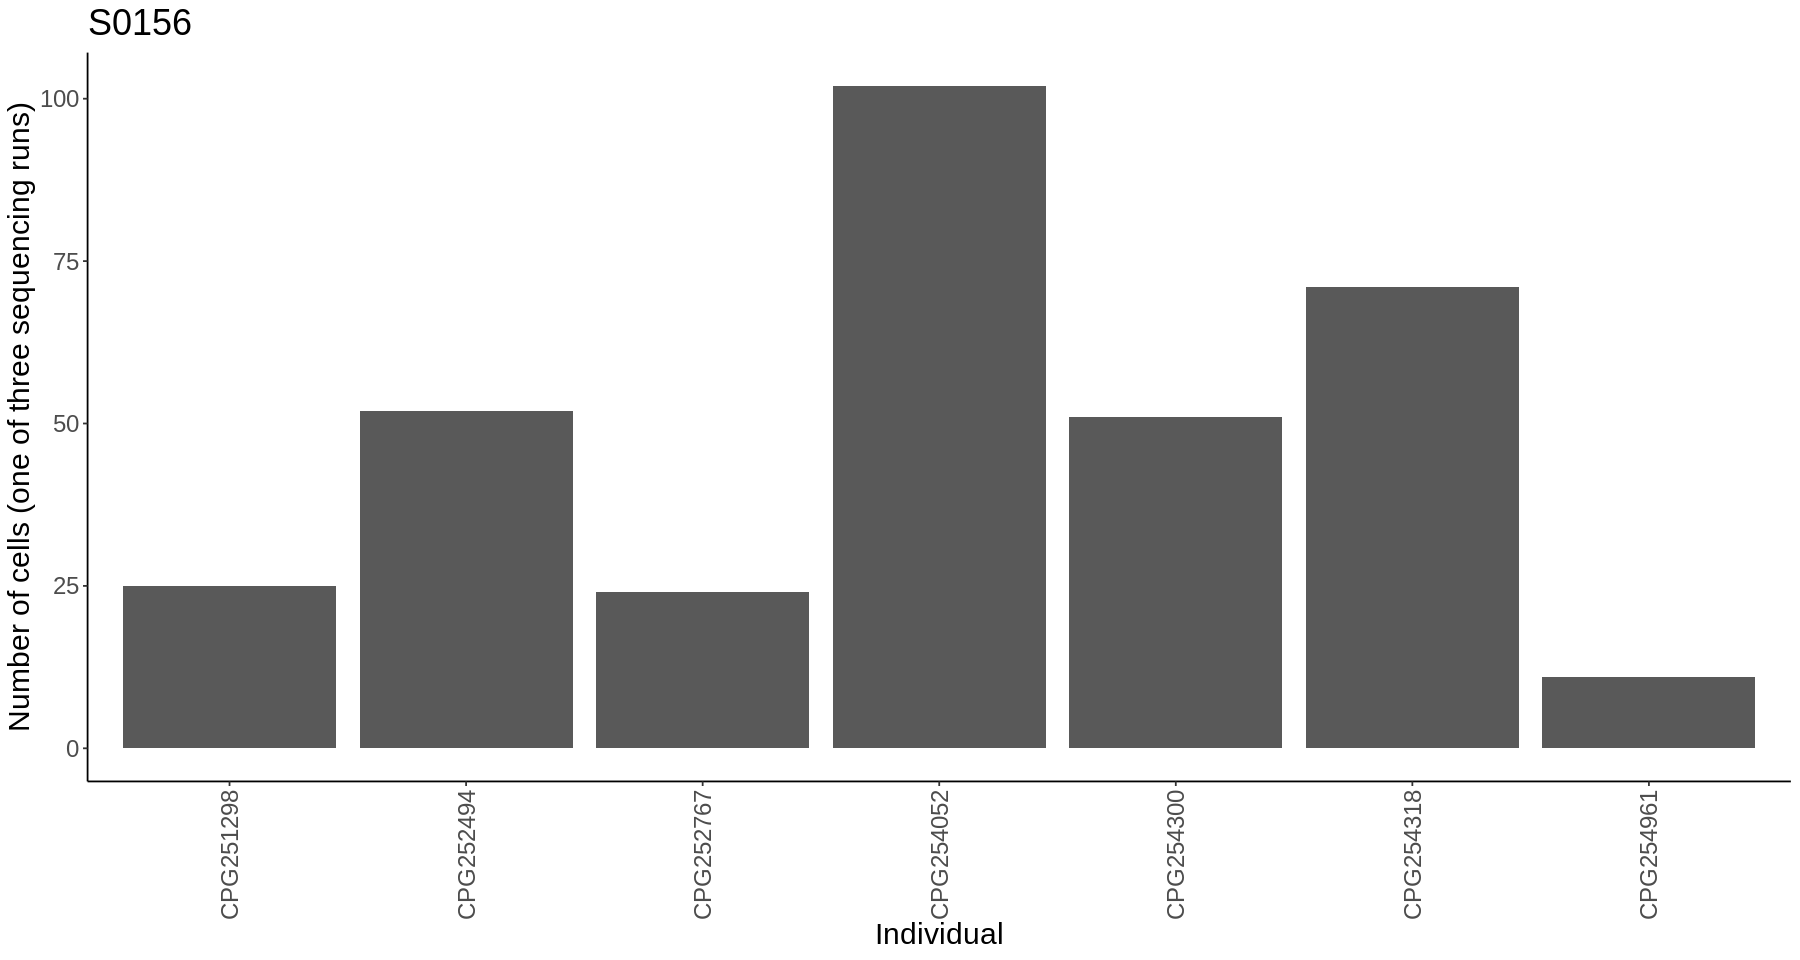

In [7]:
for (sample in all_samples){
    file = file.path(vireo_dir, sample, "summary.tsv")
    if (file.exists(file)) {
    vireo_df = read.csv(file, sep="\t")
    p = ggplot(vireo_df[!(vireo_df$Var1 %in% c("doublet","unassigned")),], aes(x=Var1, y=Freq)) + geom_bar(stat = "identity")
    p = p + theme_classic() + theme(text = element_text(size=18))
    p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
    p = p + xlab("Individual") + ylab("Number of cells (one of three sequencing runs)")
    print(p + ggtitle(sample))
    } else {
        print(glue("{file} does not exist!"))
    }

}

In [16]:
get_vireo_ncells_summary <- function(
    sample_name,
    vireo_dir
){
    file = file.path(vireo_dir, sample_name, "summary.tsv")
    if (file.exists(file)){
            vireo_df <- read.csv(file, sep="\t")
        sus_samples <- vireo_df %>%
            filter(Freq < 100) %>% 
            mutate(Pool = sample_name) %>% 
            rename("Donor" = Var1)
    return(sus_samples)
    }
}
        

In [40]:
# look at the number of cells in the data as it all looks like zero in the plots 
all_samples %>% 
    purrr::map_dfr(\(x) get_vireo_ncells_summary(
        sample_name=x,
        vireo_dir = "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo/output/")) 

Donor,Freq,Pool
<chr>,<int>,<chr>
CPG247304,6,S0058_re
CPG254169,3,S0102
CPG255828,2,S0102
CPG254201,3,S0104
CPG253609,1,S0150
CPG254128,1,S0152
CPG250902,8,S0155
CPG251306,31,S0155
CPG254037,29,S0155


# QC plots - likely sample swaps

In [5]:
possible_sample_swaps <- read_csv('/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/cellranger_outs_possible_sample_swaps.txt', col_names = "sample")

Rows: 15 Columns: 1

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sample


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [6]:
possible_sample_swaps$sample

[1] "S0070"    "S0074"    "S0077"    "S0080"    "S0083"    "S0088"   
 [7] "S0096"    "S0097"    "S0100"    "S0108"    "S0058_re" "S0102"   
[13] "S0104"    "S0150"    "S0152"

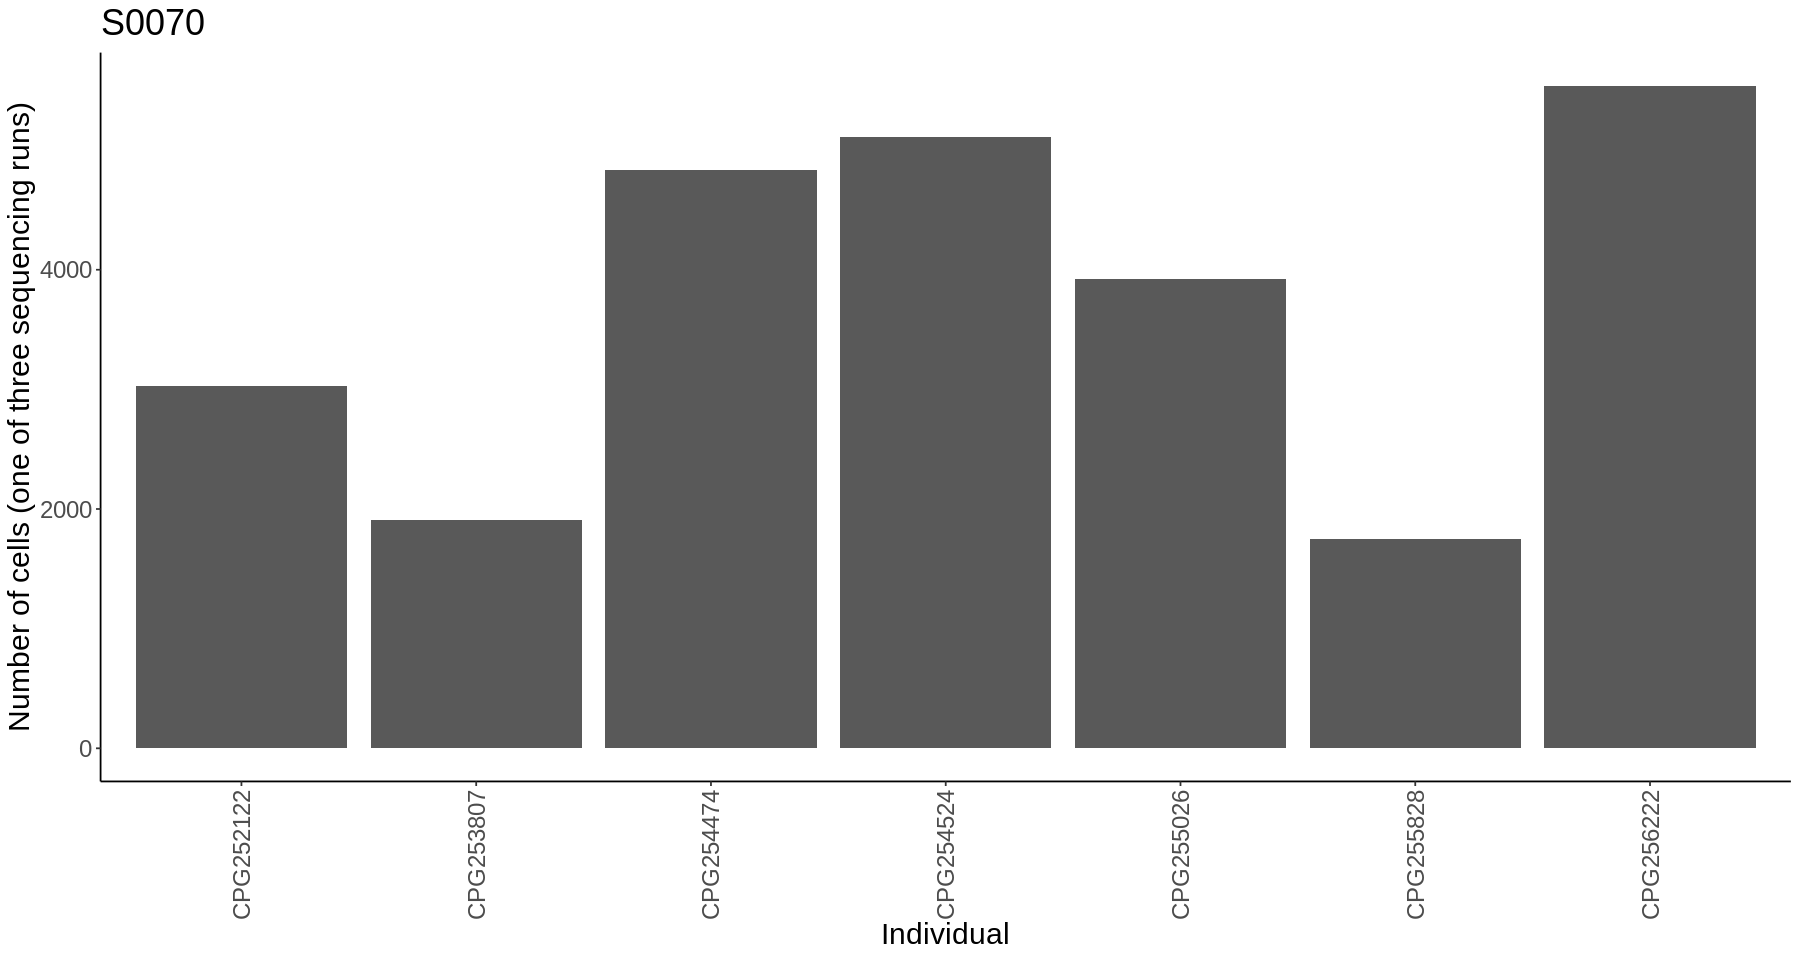

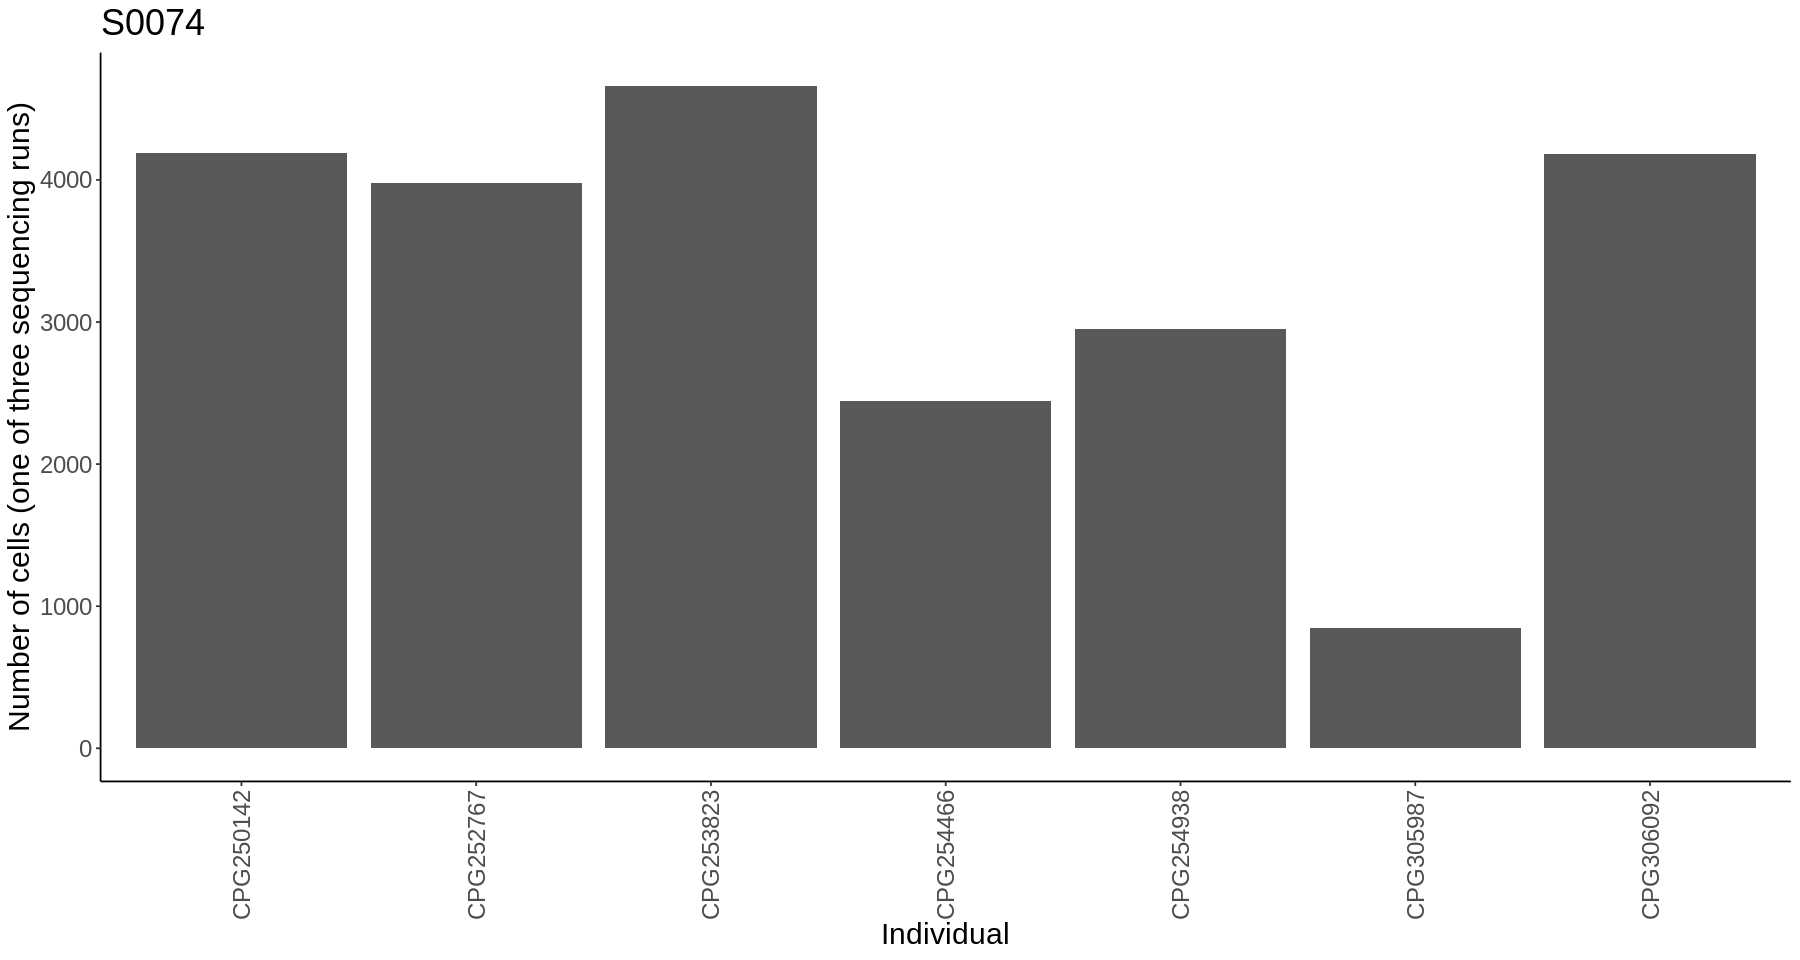

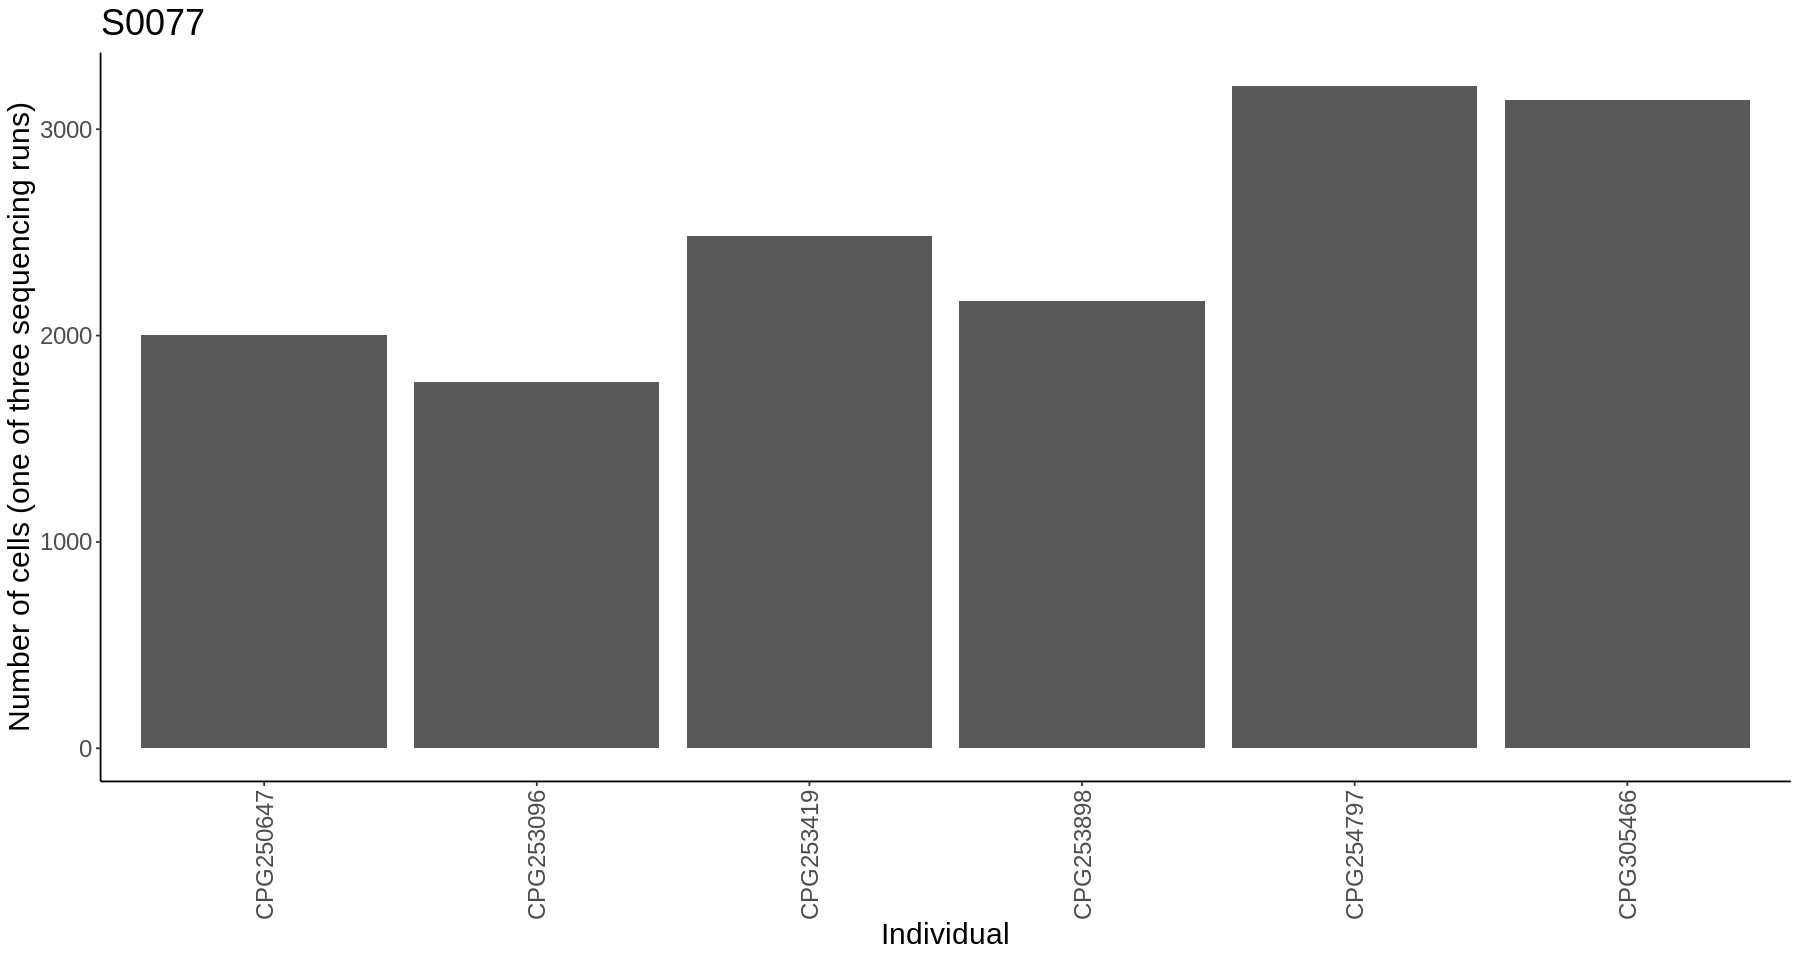

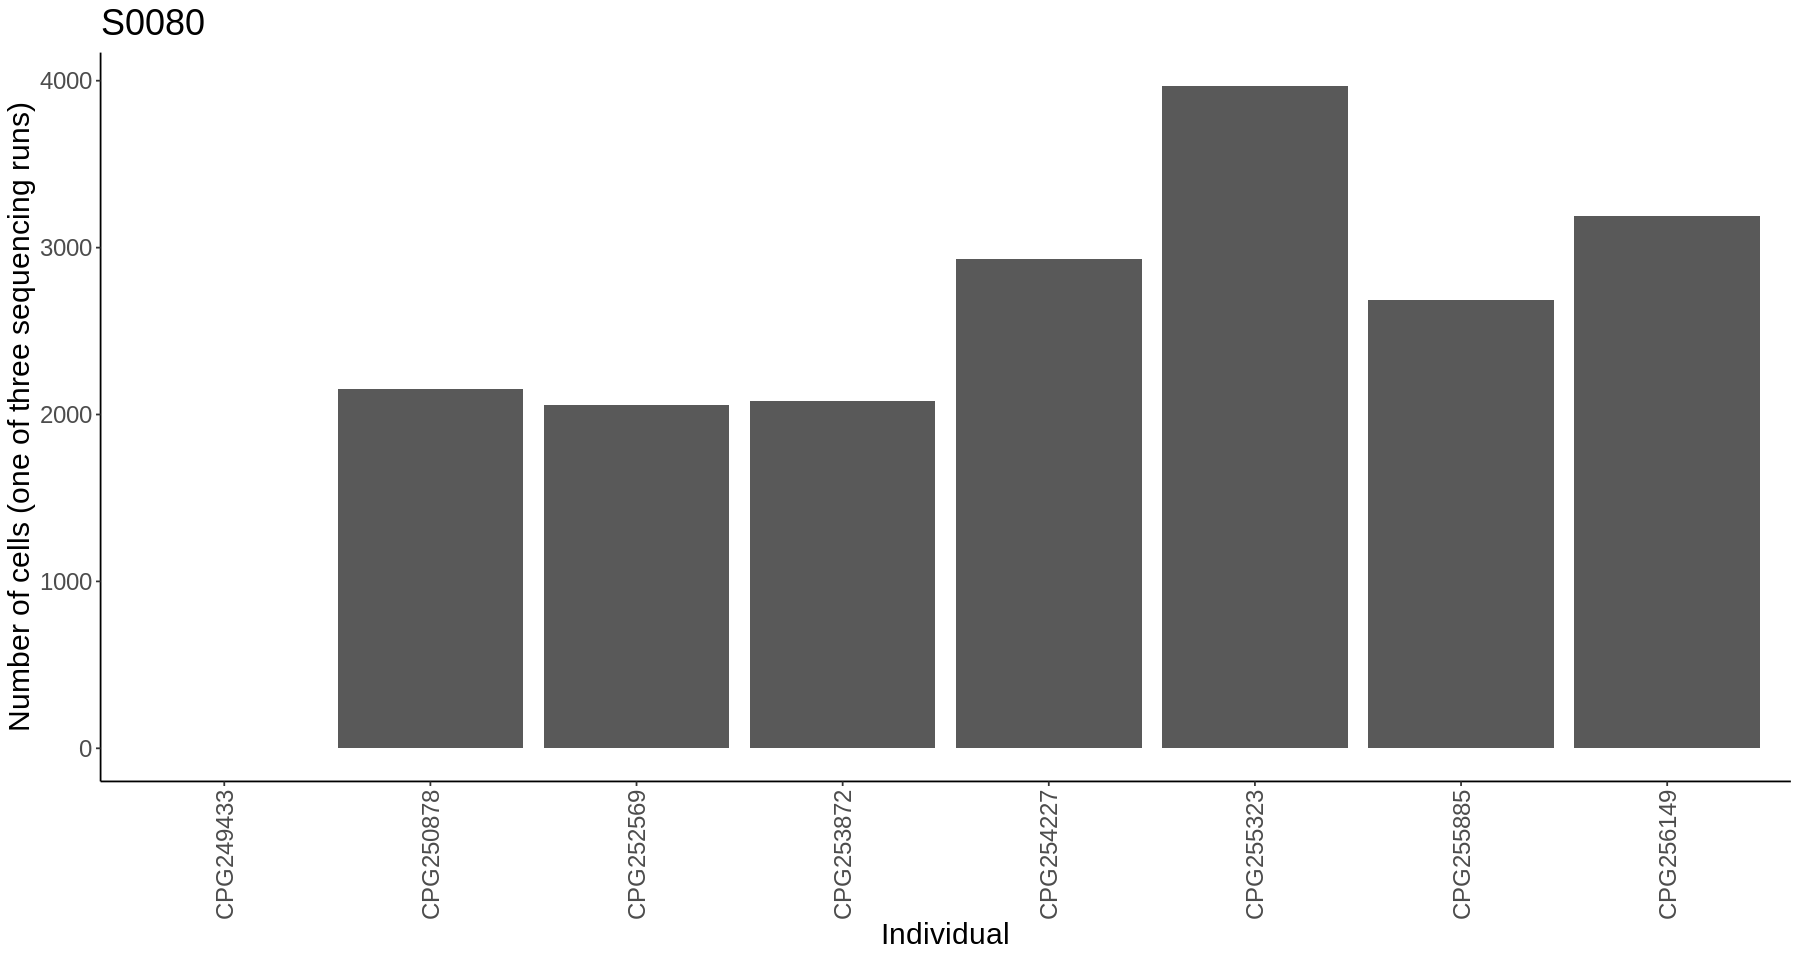

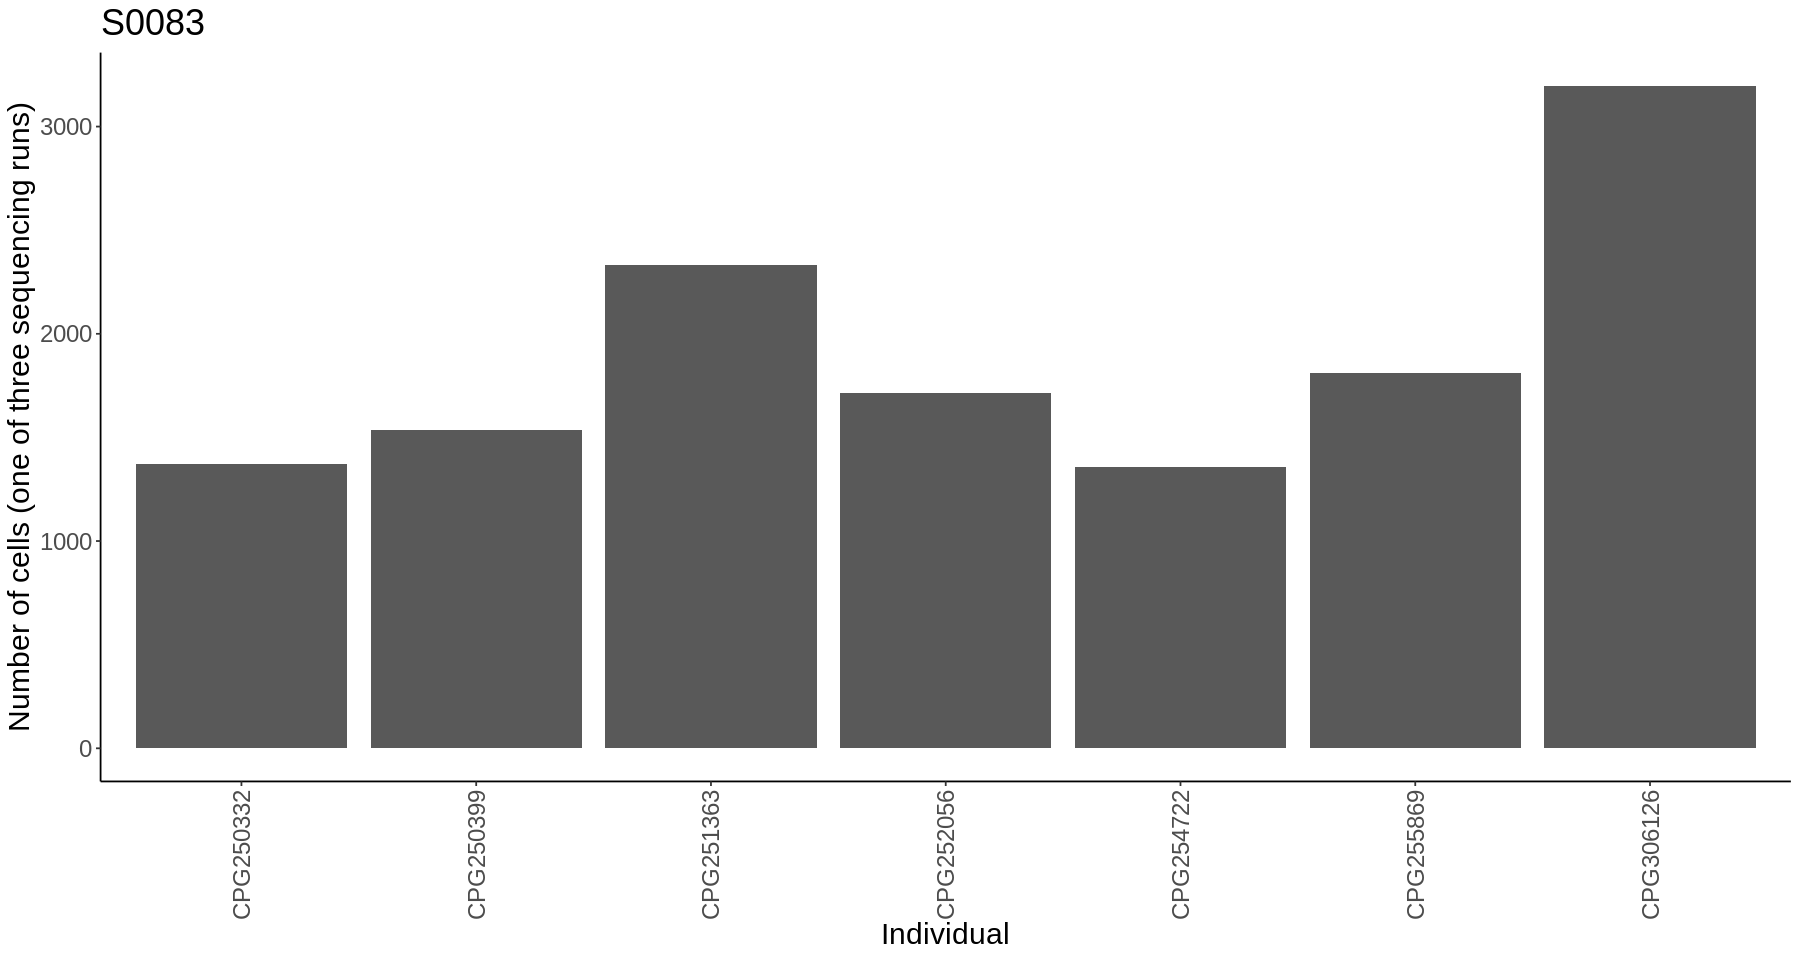

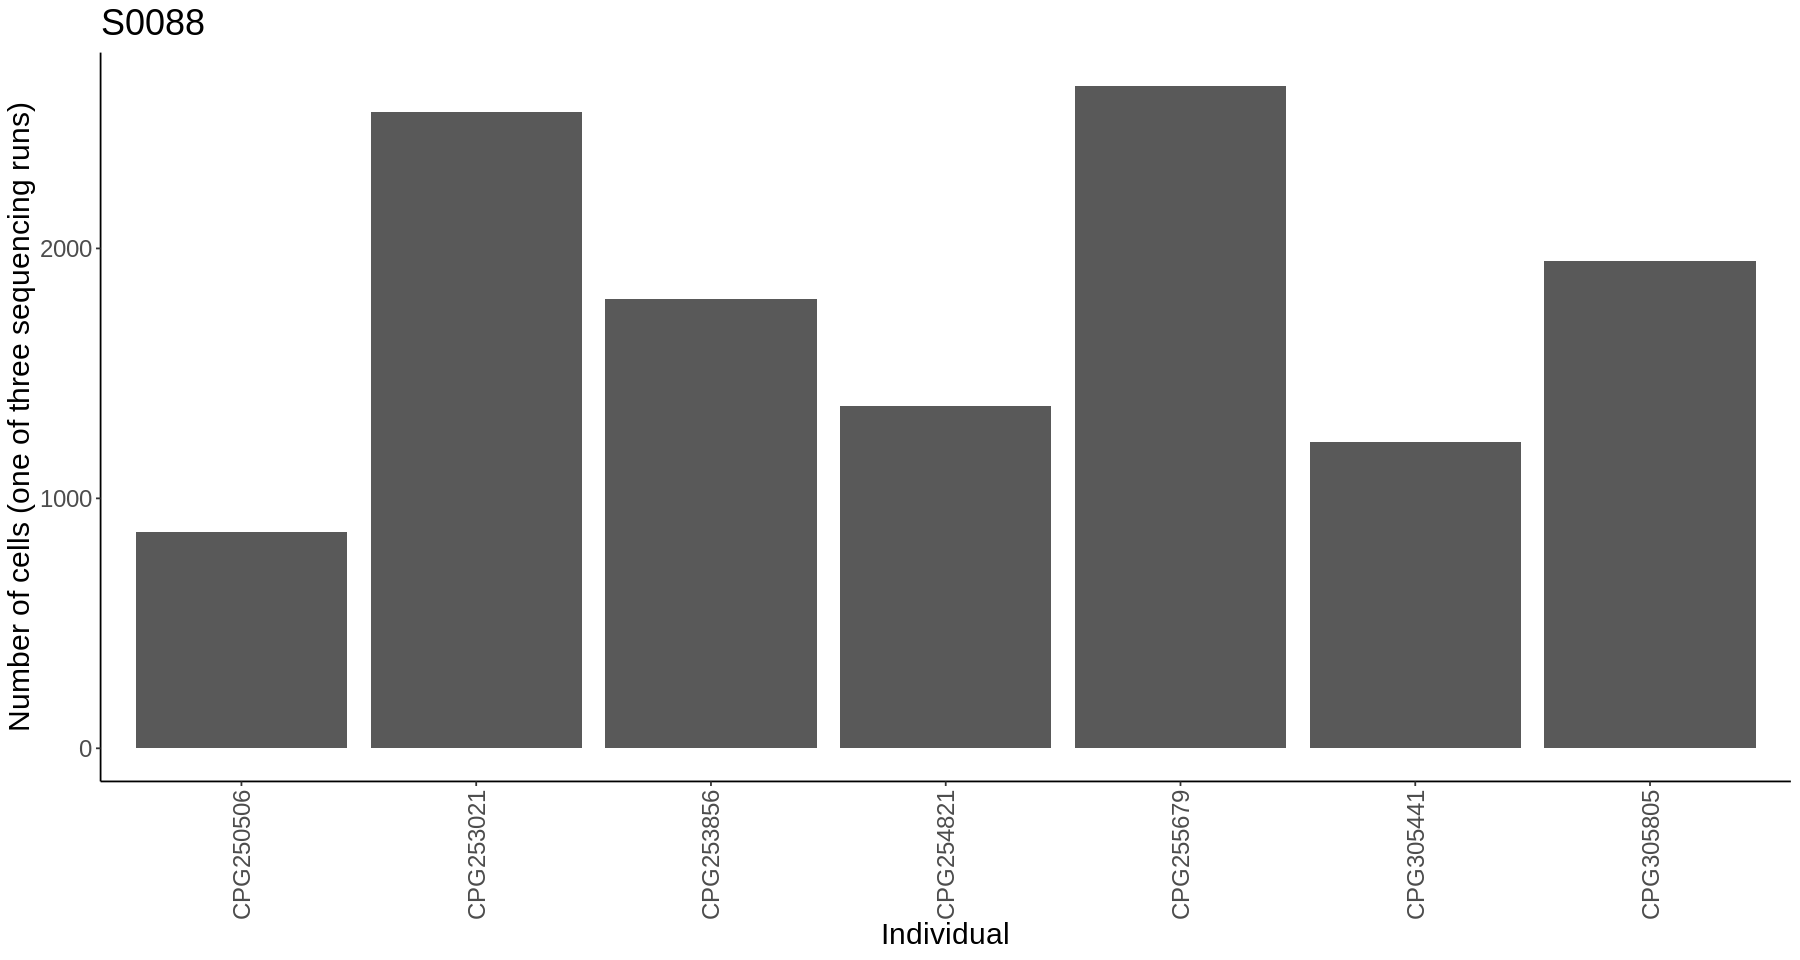

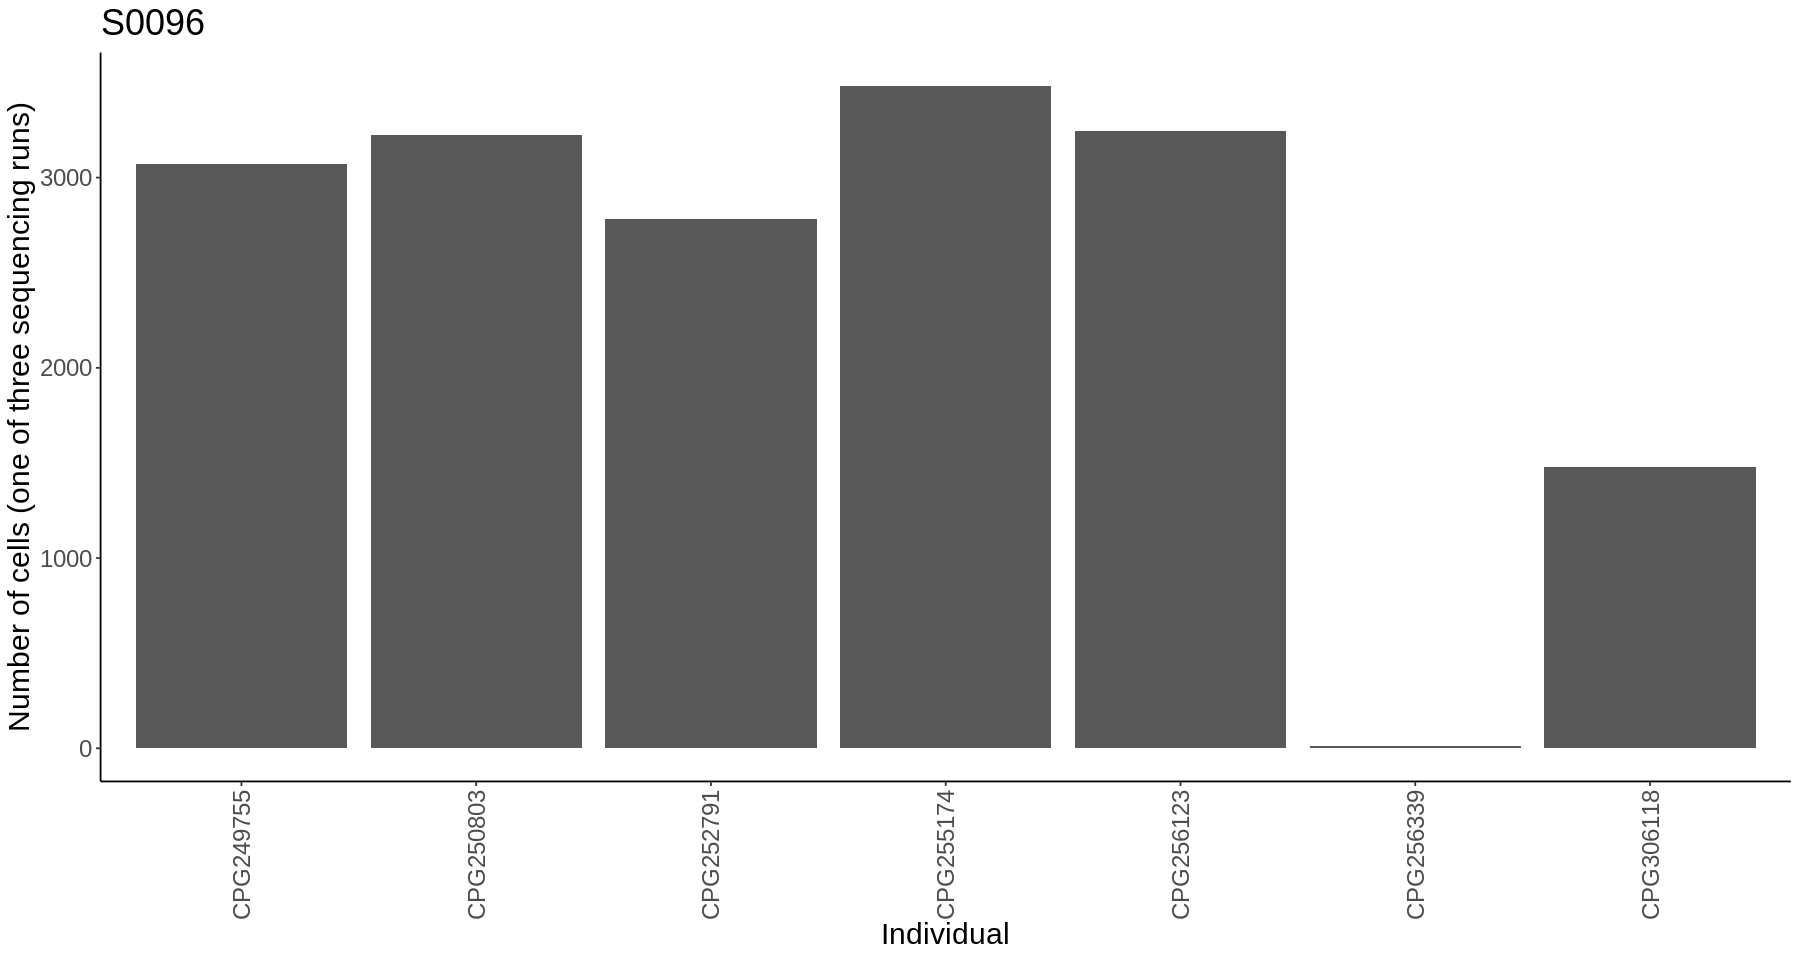

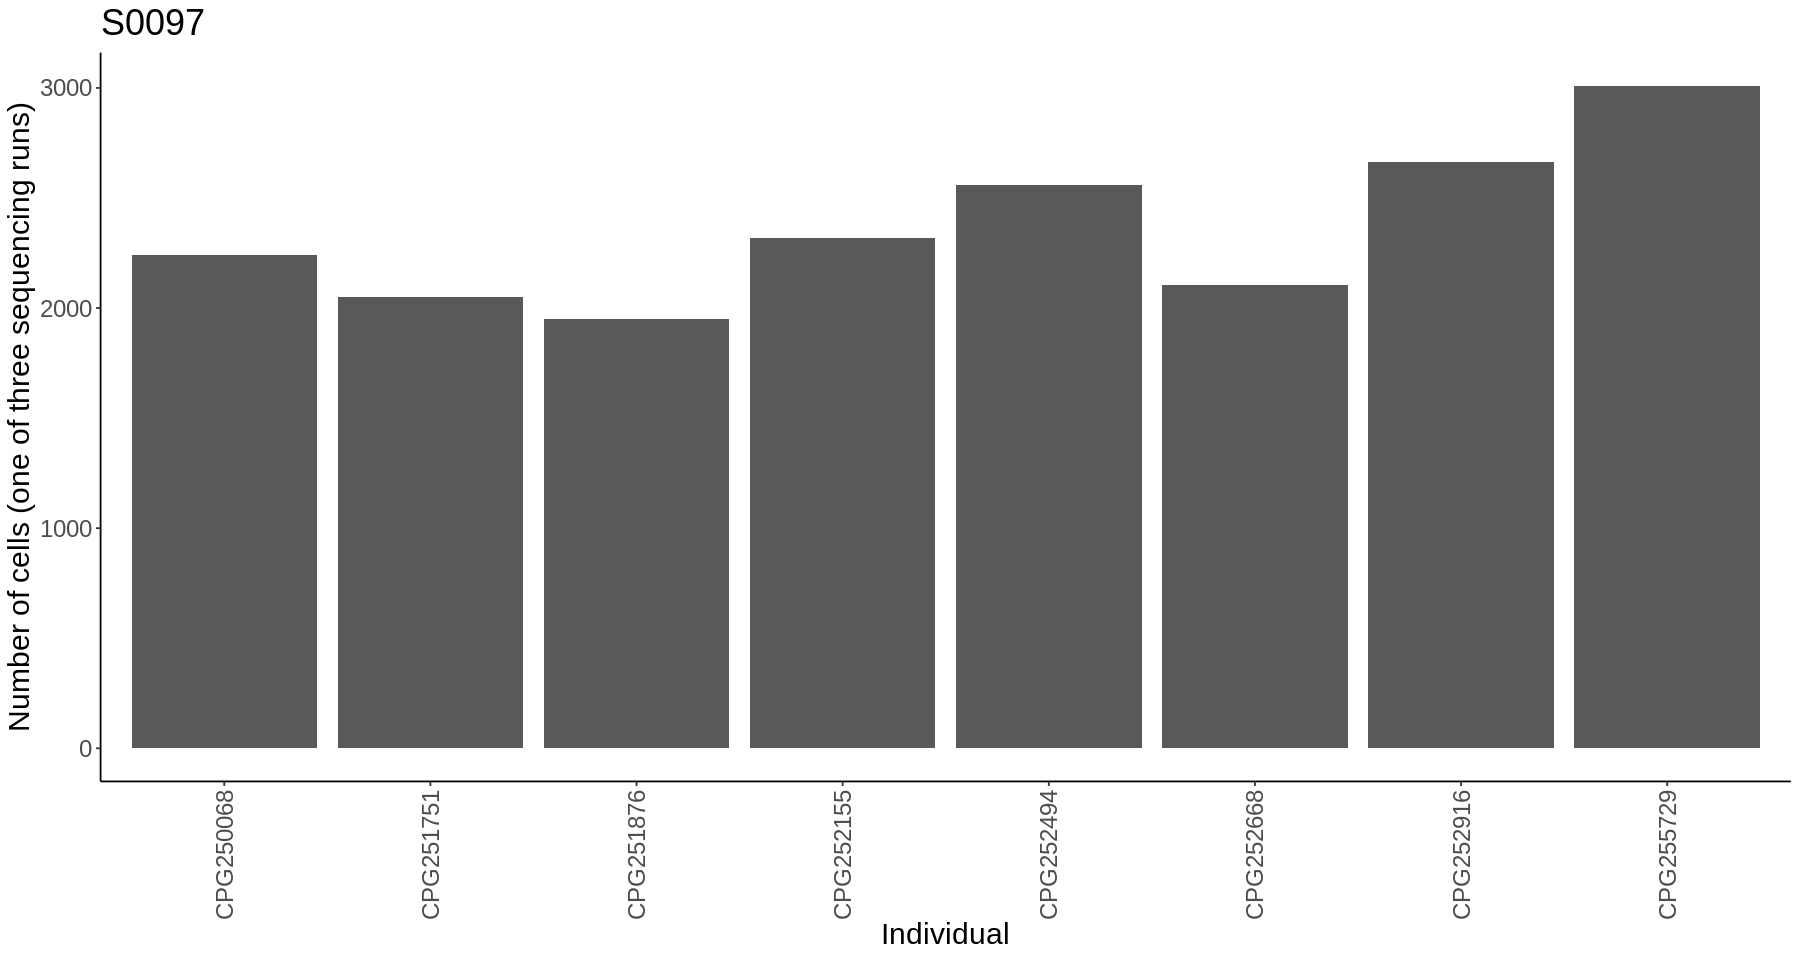

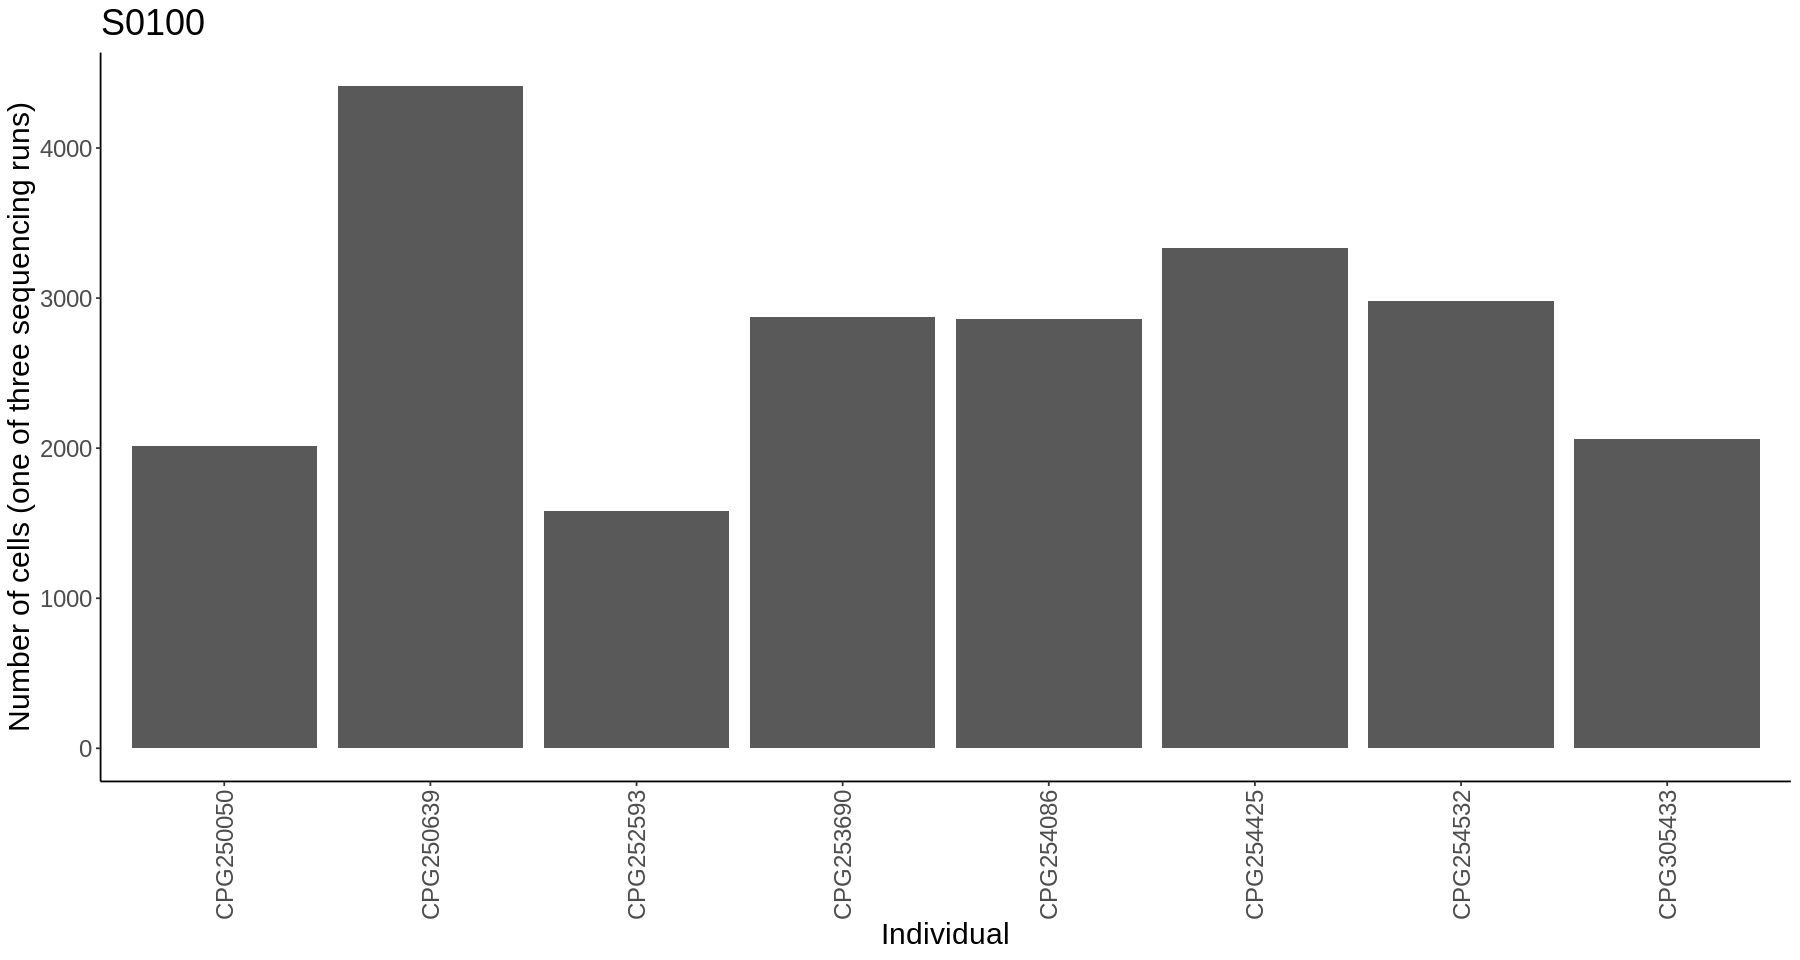

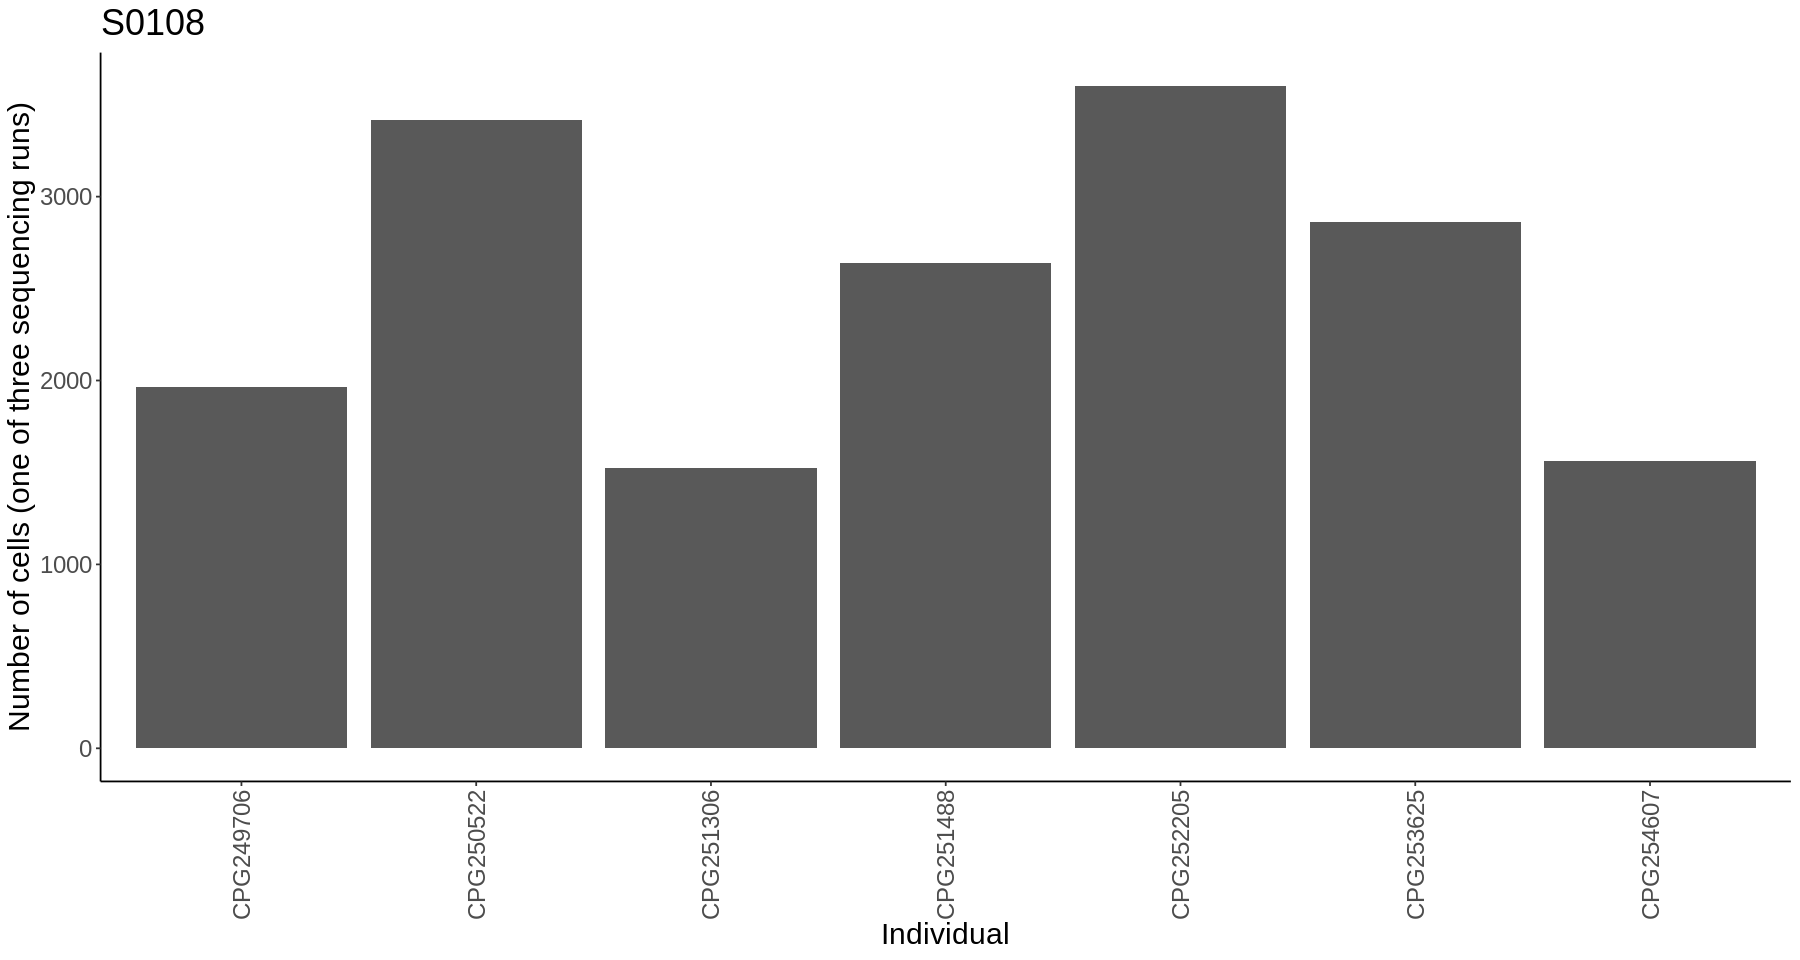

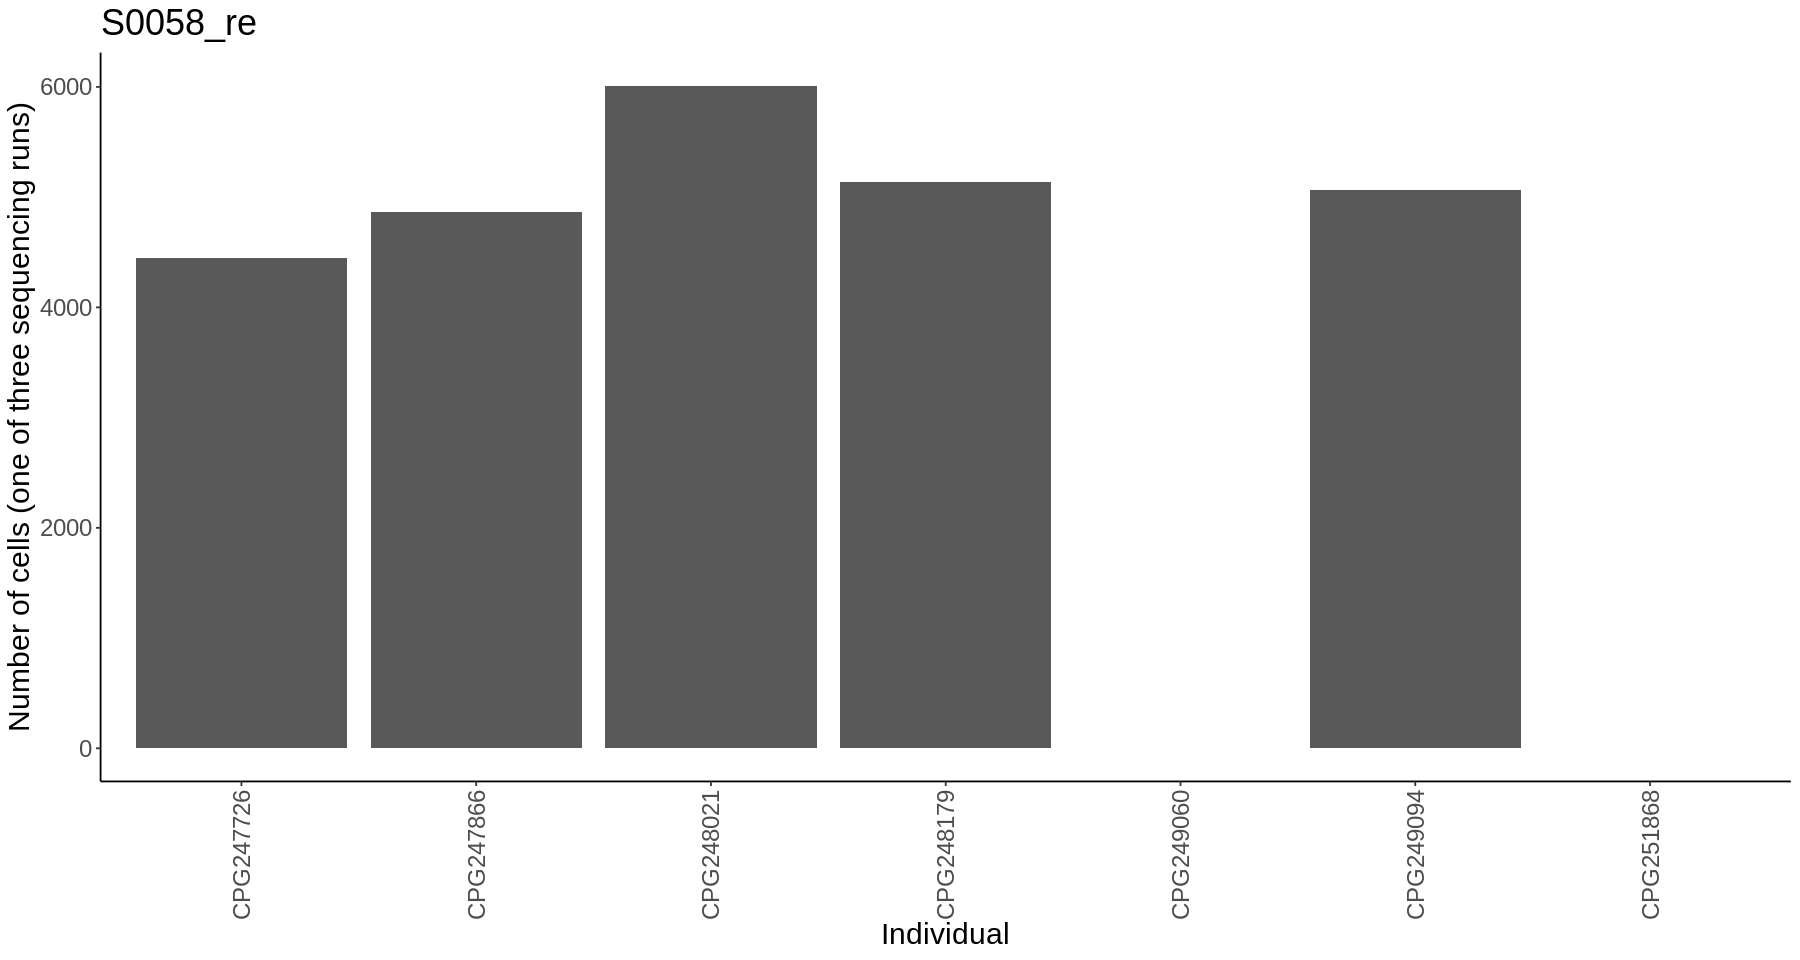

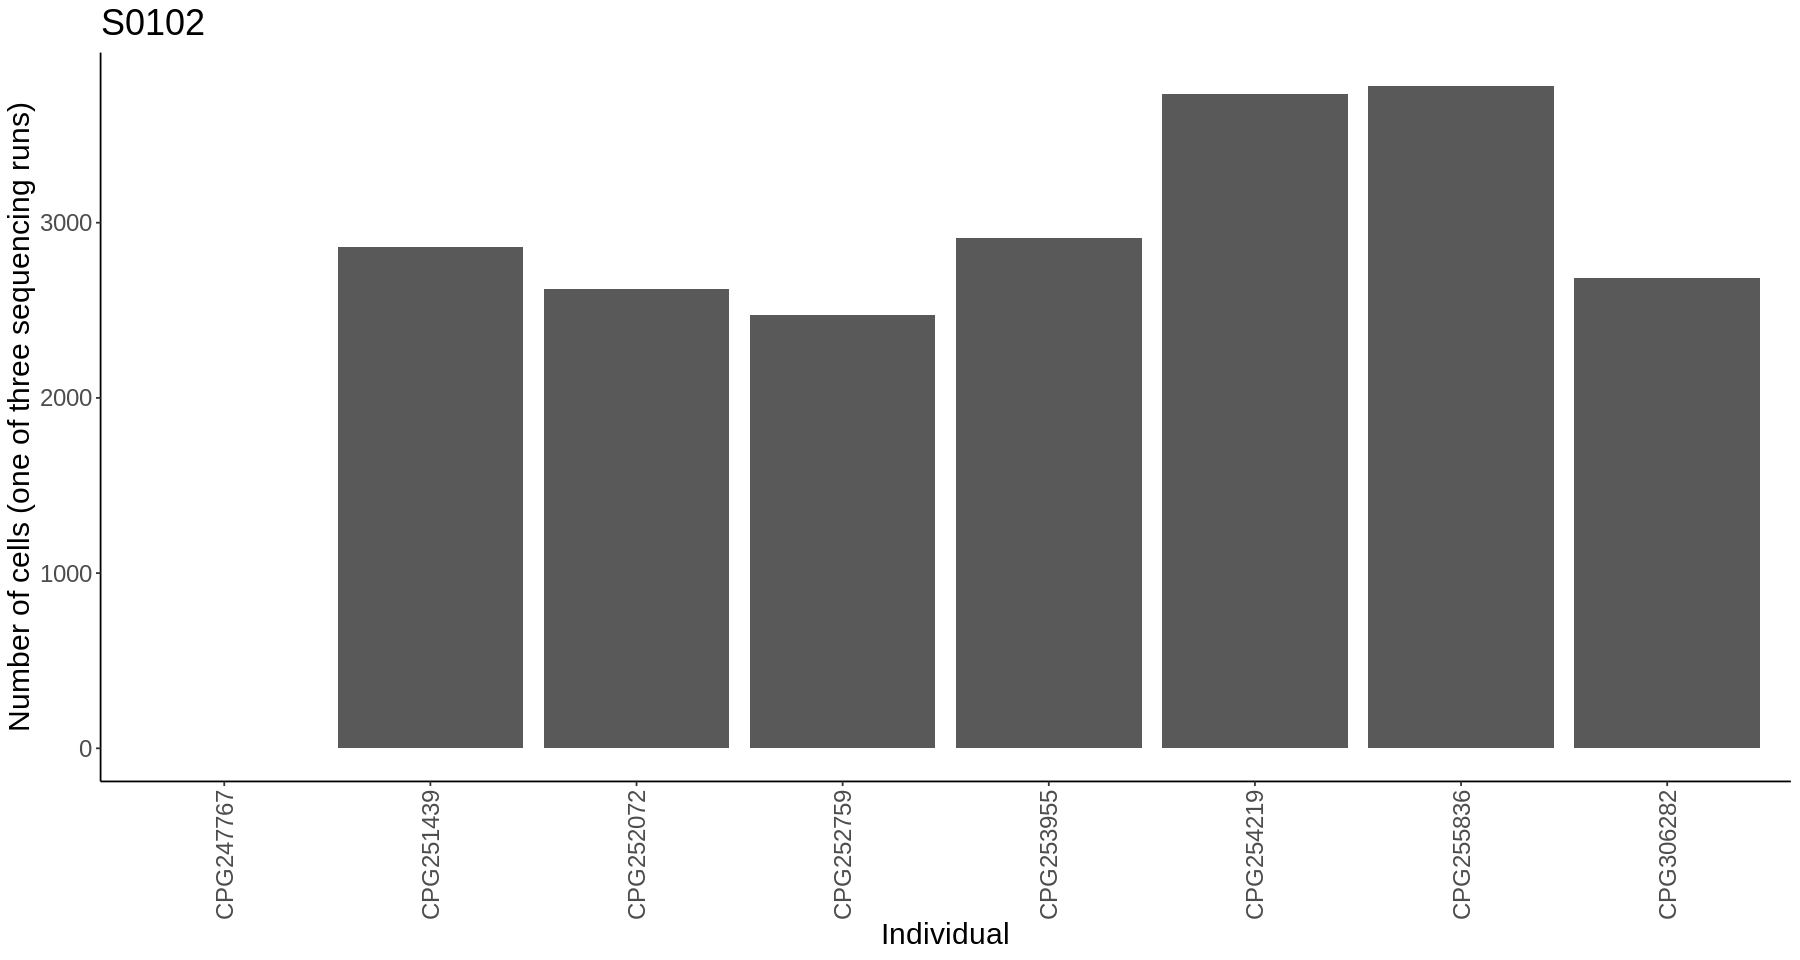

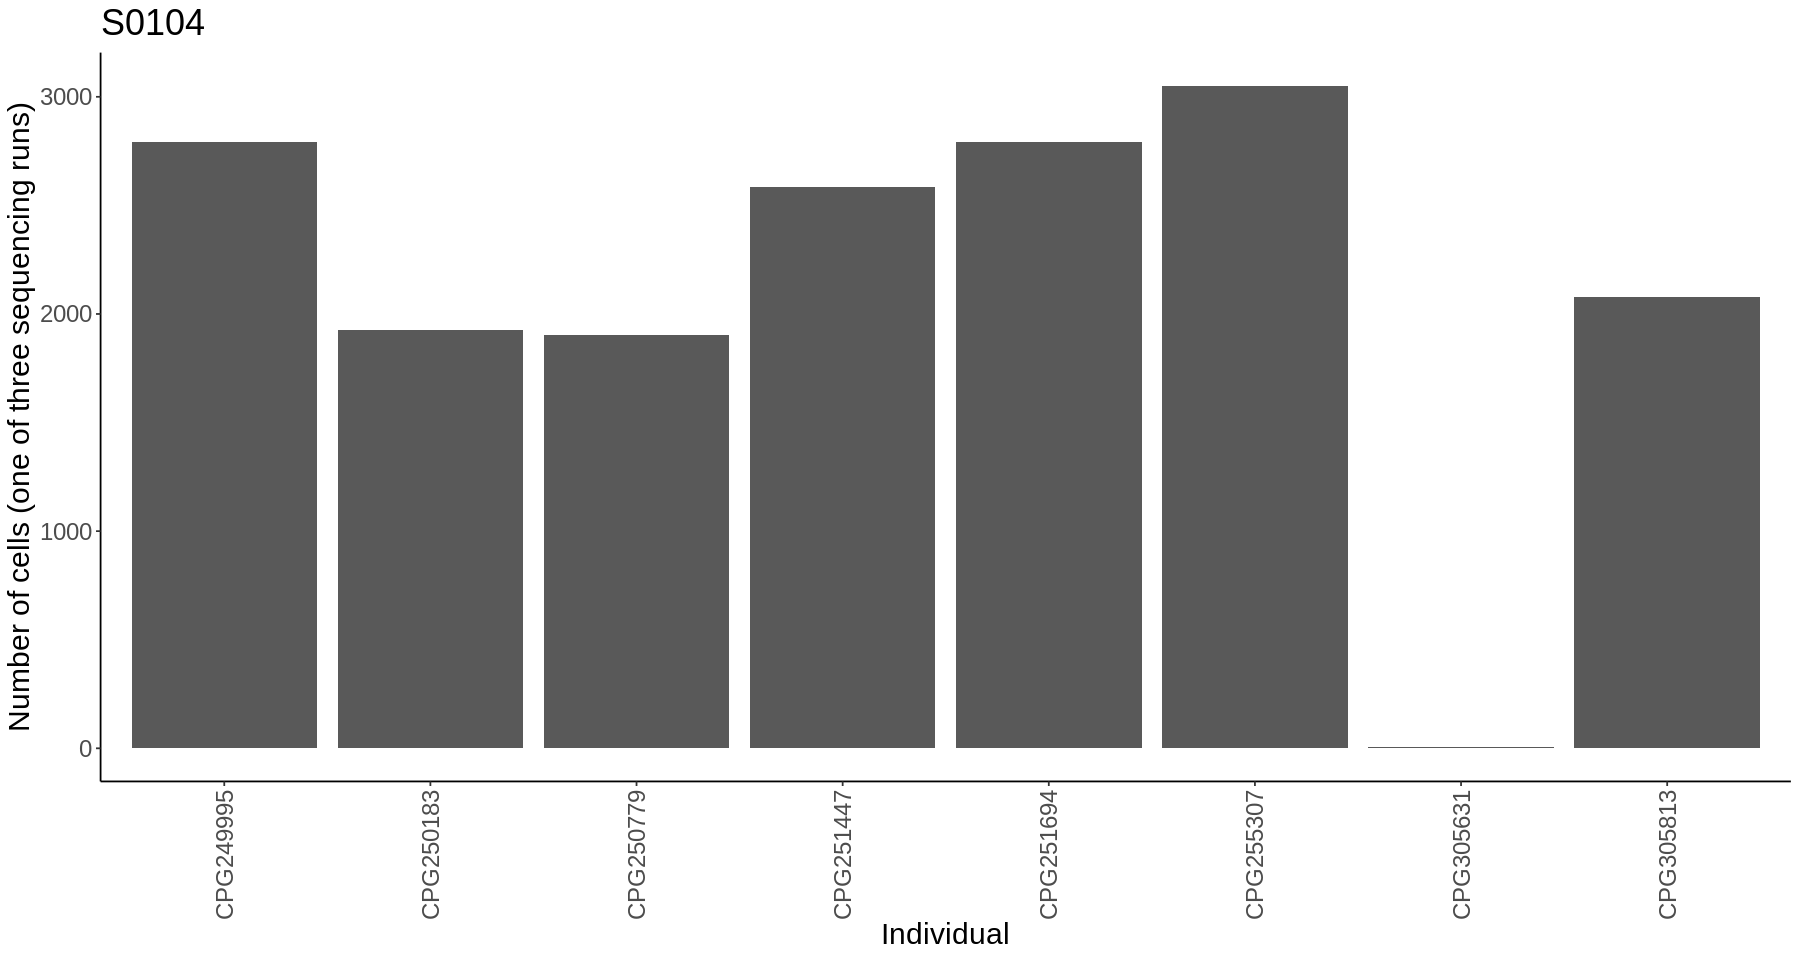

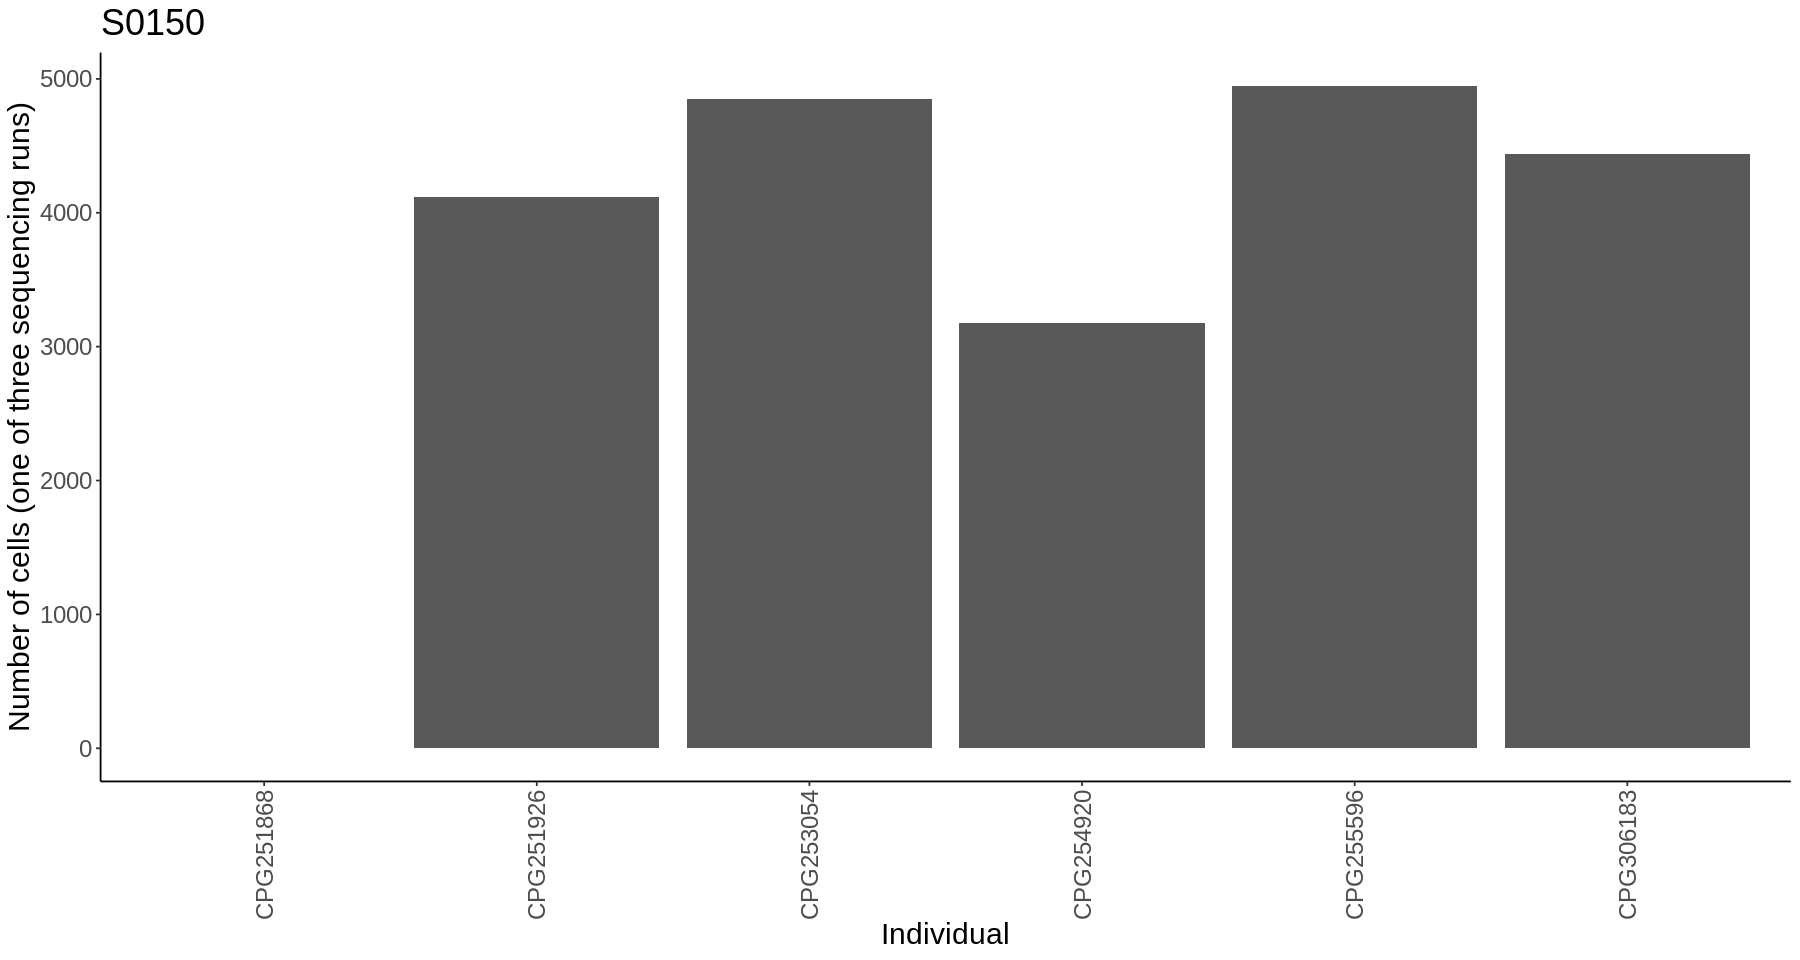

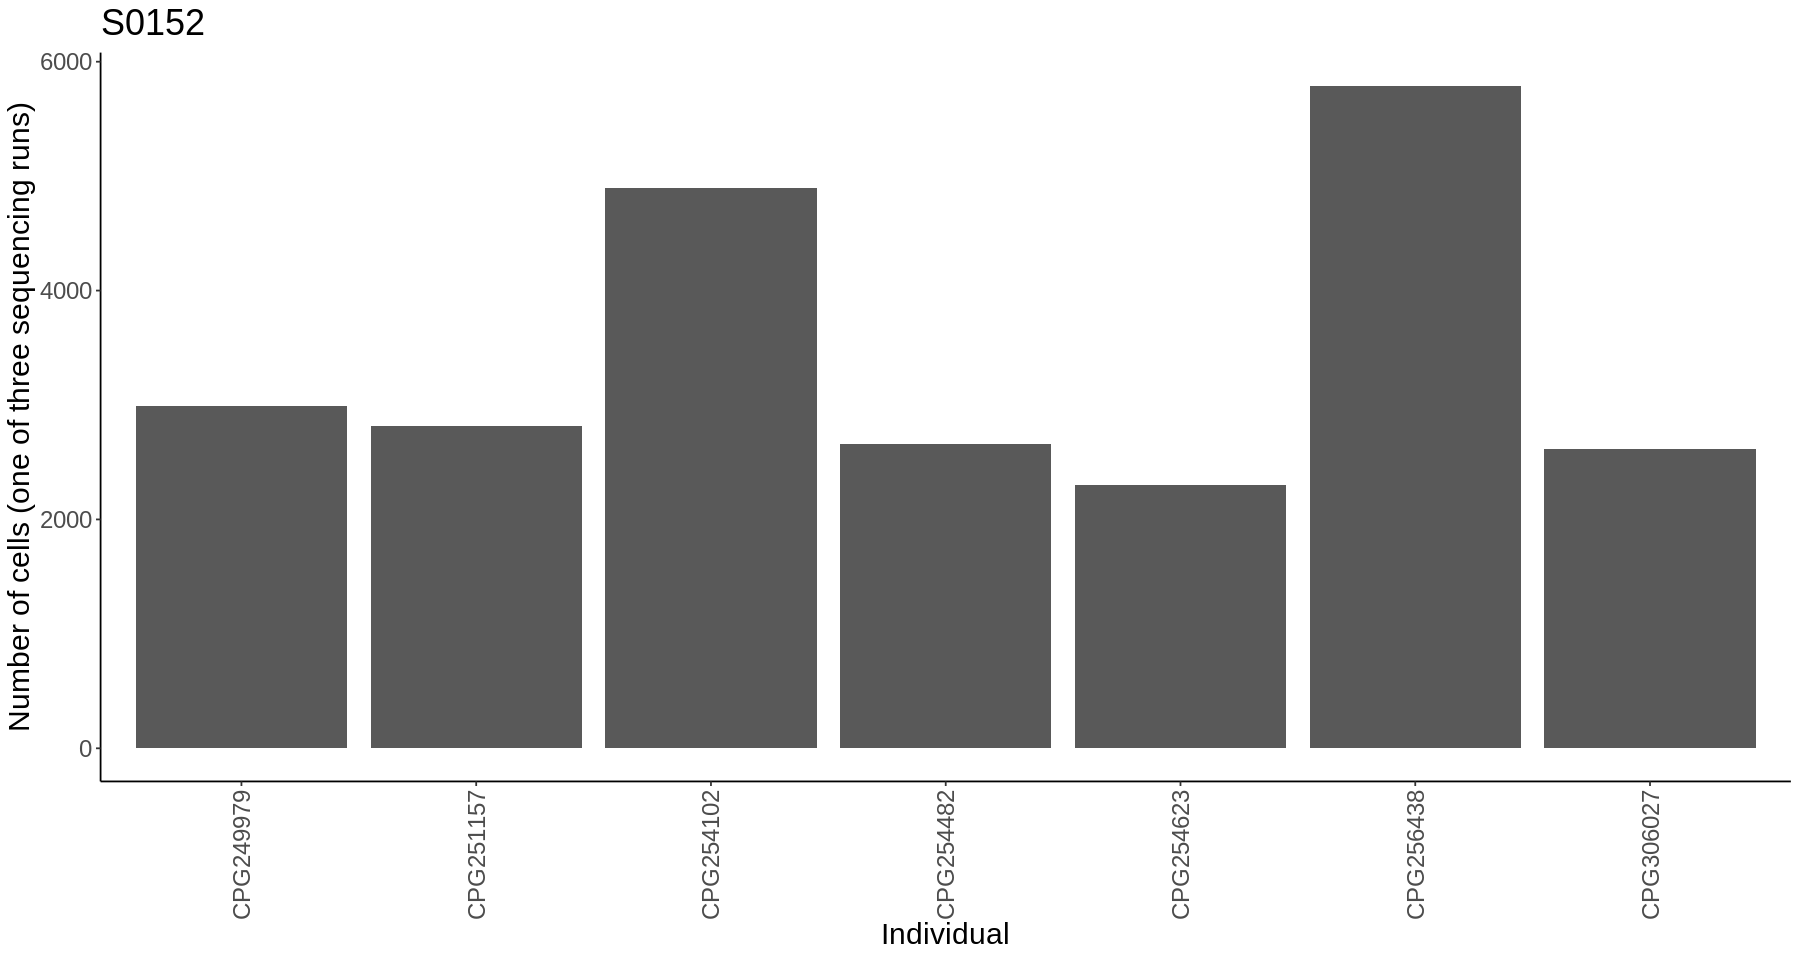

In [9]:
for (sample in possible_sample_swaps$sample){
    file = file.path('/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/demuxafy/vireo_all_samples/output/',
                     sample, "summary.tsv")
    if (file.exists(file)) {
    vireo_df = read.csv(file, sep="\t")
    p = ggplot(vireo_df[!(vireo_df$Var1 %in% c("doublet","unassigned")),], aes(x=Var1, y=Freq)) + geom_bar(stat = "identity")
    p = p + theme_classic() + theme(text = element_text(size=18))
    p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
    p = p + xlab("Individual") + ylab("Number of cells (one of three sequencing runs)")
    print(p + ggtitle(sample))
    } else {
        print(glue("{file} does not exist!"))
    }

}